<h1>Spacial density of Na BEC</h1>

The following procedure mostly follows "Bose Einstein Condensation in Dilute Gases" by C.J. Pethick and H. Smith.

We assume that we can describe the interactions beween sodium atoms by a contact ineraction including only s-wave scattering, i.e. the two-body interactions take on the form
$$U(\vec{r}_i, \vec{r}_j) = g \delta (\vec{r}_i - \vec{r}_j)$$
with
$$g = \frac{4\pi \hbar^2 a}{m}$$
Here $a$ is the s-wave scattering length. This approximation is justified in the dilute limit where the average distance between particles is much larger than the range of the interatomic potential.

Further, we make the approximation that the true many-body wavefunction is a product of single-particle wavefunctions (Hartree-Fock approximation) that are the solutions to a single-particle Hamiltonian with an effective mean-field potential. At T=0 the system is in the groundstate and in order to find it, we can apply the variational principle to the energy functional of this single-particle mean-field problem (eq. 6.9):
$$E\left[ \Psi(\vec{r}) \right] = \int d^3 r \left[ \frac{\hbar^2}{2m} \vert \nabla \Psi(\vec{r}) \vert^2 + V(\vec{r}) \vert \Psi(\vec{r}) \vert^2  + \frac12 g \vert \Psi(\vec{r}) \vert^4 \right]$$

If we minimize this w.r.t. $\Psi(\vec{r})$ we obtain the single-particle groundstate wavefunction (and thus the approximate many-body groundstate wavefunction)! Actually, it can even be shown that there exists a functional, which under minimization yields fictitious single-particle states that lead to the exact many-body groundstate (see Hohnberg & Kohn theorems), but unfortunately it is not known how that functional looks like, but at least it is proven to exist. Back to our functional, applying the variational principle yields that it is minimized by the solutions to the  so-called Gross-Pitaevskii equation (eq. 6.11):
$$\left[ -\frac{\hbar^2}{2m} \nabla^2 + \underbrace{V(\vec{r}) + g n_0(\vec{r})}_{V_{eff}(\vec{r})} \right] \Psi(\vec{r}) = \mu \Psi(\vec{r})$$
Here, we have:

$$n_0(\vec{r}) = \vert \Psi(\vec{r}) \vert^2 = \text{Density of condensed particles}$$
$$\mu = \text{Chemical potential}$$

If we go away from T=0, then the system is not in the groundstate anymore, but there can also be single-particle excitations within our mean-field approach. If the particle density does not change drastically over a region of space on the length scale of the thermal de Brogli wavelength, we may employ a semiclassical approximation to account for the excitations. Namely, we assume that the density is constant within a phase space volume $\frac{d^3 r d^3 p}{(2 \pi \hbar)^3}$ and thus the quantity $f_{\vec{p}}(\vec{r})\frac{d^3 r d^3 p}{(2 \pi \hbar)^3}$ (where $f_{\vec{p}}(\vec{r})$ is the distribution function determining the average occupancy of a single-particle quantum state $\epsilon_{\vec{p}}(\vec{r})$) is the mean number of particles within phase-space volume $d^3 r d^3 p$. Integrating this over the entire phase-space should yield the total number of particles and consequently, integrating it only over momentum space gives the spacial density! For non-interacting bosons the thermal equilibrium distribution function is just the Bose Einstein statistics function
$$f(\epsilon) = \frac{1}{\exp{(\frac{\epsilon - \mu}{k_B T})} - 1}$$
where $\epsilon = \epsilon_{\vec{p}}(\vec{r})$ is the (mean-field) single-particle energy. We cannot use the semiclassical approximation for the condensed state as its density varies on length scales comparable with those over which the external (trap) potential varies significantly, but we can use it to account for the excited state density. This then just becomes
$$n_{ex}(\vec{r}) = \int \frac{d^3 p}{(2\pi \hbar)^3} \frac{1}{\exp \left( \frac{\epsilon_{\vec{p}}(\vec{r}) - \mu}{k_B T} \right) - 1}$$

This modifies now our particle density to contain a condensed part and a non-condensed part, i.e.
$$n(\vec{r}) = n_0(\vec{r}) + n_{ex}(\vec{r}) = \vert \Psi(\vec{r}) \vert^2 + n_{ex}(\vec{r})$$

In order to find the total particle density $n(\vec{r})$ for weakly interacting bosons at low, but finite temperatures $T\neq 0$, we can thus employ the following procedure:

1) Initialize $n_0(\vec{r})$ and $n_{ex}(\vec{r})$ by a guess, e.g. set $n_0(\vec{r})$ to some Gaussian and set $n_{ex}(\vec{r})$ to zero.

2) Solve the generalized GPE including now the condensed and non-condensed density (see section 8.3 of "Bose Einstein Condensation in Dilute Gases", which describes how to describe excitations of the mean-field single-particle approximation), i.e. (see eq. 8.110)
$$\left[ -\frac{\hbar^2}{2m} \nabla^2 + V(\vec{r}) + g \left[ n_0(\vec{r}) + 2n_{ex}(\vec{r}) \right] \right] \Psi(\vec{r}) = \mu \Psi(\vec{r})$$ 
where $V(\vec{r})$ is the external (trapping) potential.
This updates the condensed density as 
$$n_0(\vec{r}) \leftarrow  \vert \Psi(\vec{r}) \vert^2$$

Note, that numerically solving the generalized GPE quickly becomes computationally expensive in 3d. Numerically, it might be better to use steepest gradient descent methods directly on some generalized energy functional including the thermal density as mean field. To save the trouble alltogether, we can employ the Thomas Fermi approximation (valid for large particle numbers), that neglects the kinetic energy term, thus yielding an algebraic equation for $\Psi(\vec{r})$ instead of a differential equation. Usually this is done in the context of the GPE at zero temperature, but we can also employ it here and then solving the generalized GPE (without the term $-\frac{\hbar^2}{2m} \nabla^2$) for $n_0(\vec{r})$ gives us the way easier update rule
$$n_0(\vec{r}) \leftarrow \frac{\mu - (V(\vec{r}) + 2 g n_{ex}(\vec{r}))}{g}$$

3) Next, we need to update the thermal density $n_{ex}(\vec{r})$. In a semiclassical Popov approximation (the Popov approximation is also a mean-field approach, but going a bit beyond Hartree-Fock by allowing for mixing of particle-like and hole-like single-particle excitations) we get the following single-particle excited energies (eq. 8.119)
$$\epsilon_{\vec{p}}(\vec{r})= \sqrt{\left( \frac{p^2}{2m} + V(\vec{r}) + 2 g \left[ n_0(\vec{r}) + n_{ex}(\vec{r}) \right] - \mu \right)^2 - \left( g n_0(\vec{r}) \right)^2}$$
Then, the excited (non-condensed) particle density is just semiclassically (eq. 8.122)
$$n_{ex}(\vec{r}) \leftarrow \int \frac{d^3 p}{(2\pi \hbar)^3} \frac{\frac{p^2}{2m} + V(\vec{r}) + 2g \left[ n_0(\vec{r}) + n_{ex}(\vec{r}) \right] - \mu}{\epsilon_{\vec{p}}} \frac{1}{\exp \left( \frac{\epsilon_{\vec{p}}}{k_B T} \right) - 1}$$

Note, if we use the semiclassical Hartree Fock approximation instead of the semiclassical Popov approximation, we get a bit simpler expressions, namely (eq. 8.115 & 8.121)
$$\epsilon_{\vec{p}}(\vec{r})= \frac{p^2}{2m} + V(\vec{r}) + 2 g \left[ n_0(\vec{r}) + n_{ex}(\vec{r}) \right]$$
$$n_{ex}(\vec{r}) \leftarrow \int \frac{d^3 p}{(2\pi \hbar)^3} \frac{1}{\exp \left( \frac{\epsilon_{\vec{p}} - \mu}{k_B T} \right) - 1}$$

4) Iterate through steps 2. and 3. inserting the current condensed and non-condensed densities $n_0(\vec{r})$ and $n_{ex}(\vec{r})$ unitil convergence. Note, that it must hold the normalization condition
$$\int d^3 r \; n(\vec{r}) = \int d^3 r \; (n_0(\vec{r}) + n_{ex}(\vec{r})) = N$$
where N is the total number of particles. So after each update of $n_0(\vec{r})$ and $n_{ex}(\vec{r})$ we need to obtain the predicted particle number $N_{pred}$ based on the current condensed and thermal densities. Then, we compare $N_{pred}$ with the actual given particle number $N$, and adapt the chemical potential as
$$\mu \leftarrow \alpha \frac{N_{pred} - N}{N} \mu_{old}$$
where $\alpha$ is some numerical hyperparamater. This decreases $\mu$ if the predicted particle number is too large and increases $\mu$ if the predicted particle number is too small. We call the densities converged, if the change in particle number and in chemical potential is less than some relative threshold.

5) After convergence, we can obtain the spatial density of weakly interacting bosons at low temperatures as
$n(\vec{r}) = n_0(\vec{r}) + n_{ex}(\vec{r})$ and also the chemical potential $\mu$.



In [1]:
import numpy as np
from scipy.integrate import simpson
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit
import astropy.units as u
from astropy.constants import hbar, k_B
from astropy.units import Quantity
from typing import Callable, Union, Tuple

<h3>Class to implement the above outlined procedure</h3>

In [2]:
"""
    TODO 1: Generalize to include fermions by doing variation of the energy functional provided in 
            10.1103/PhysRevA.101.063618 or 10.1103/PhysRevA.74.053626. This is in principle for zero-
            temperature, but I can generalize it to finite temperature similarly as this implementation.
            I just have to find the analogon to the generalized GPE that comes out from variation of 
            the energy functional including fermions and let it also interact with the thermal mean field.
            Question: Do I also need thermal fermionic effects?
    TODO 2: Dynamically adjust the spacial grid to have more points where density varies much and
            less points where it is almost constant.
    TODO 3: Perhaps it would even be better to get rid of the spacial grid alltogether and just expand the equations
            in some spacial basis (e.g. plane waves) and truncate after a certain order. Then instead of a $N^3$ dimensional
            problem that arises when using a spacial grid with $N$ points in each direction, we would have a $M$ dimensional
            problem where $M$ is the truncation parameter. This precedure is standard in DFT and could safe considerable 
            computational cost!
    TODO 4: Include warnings if the provided trap potential is not trapping and the density just spreads
            towards infinity in space -> then the provided space size will be too small at some point 
            and the normalizatin condition in that confined space is no longer justified.
    TODO 5: Think about whether it's better to provide the temperature and find the condensate fraction in
            the algorithm, or rather switch it and provide the condensate fraction and let it find the temperature?
    TODO 6: Implement a solver for the generalized GPE or rather the generalized equation at T!=0 that will come
            from the variation of the energy functional including fermions in case we do not want to use the Thomas
            Fermi approximation! Maybe it's possible to directly minimize the energy functional with respect to the 
            densities including the thermal one using steepest gradient descent methods (it's certainly the way to go 
            at T=0 w.r.t. the bosonic and fermionic densities without thermal contributions).
"""
pass

In [3]:
class BEC:
    """
    The BEC (Bose-Einstein Condensate) class is designed to model and analyze the properties of a Bose-Einstein 
    condensate. It allows for the calculation of the spacial density of weakly interacting bosons at low temperatures
    by iteratively updating the condensed density (either with Thomas Fermi approximation or by solving the 
    generalized Gross-Pitaevskii equation) and the thermal density (either with a semiclassical Hartree Fock or 
    semiclassical Popov approximation). It also fixes the chemical potential to ensure the normalization to a 
    specific particle number.

    Attributes:
        m (Quantity): Mass of a single particle in kilograms.
        a_s (Quantity): s-wave scattering length in meters.
        N_particles_target (int): Target number of particles in the condensate.
        T (Quantity): Temperature of the condensate in nanoKelvin.
        V_trap_array (Quantity): Array containing the external trapping potential values at each grid point.
        x, y, z (Quantity): 1D arrays of spatial grid points in micrometers.
        g (Quantity): Contact interaction strength.
        num_grid_points (tuple): Number of grid points in each spatial dimension.
        dx, dy, dz (Quantity): Grid spacings in each spatial dimension.
        X, Y, Z (np.ndarray): Meshgrid arrays for spatial coordinates.
        mu (Quantity): Chemical potential.
        n0_array, n_ex_array, n_array (np.ndarray): Arrays for the condensed density, non-condensed density, and total 
                                                    density respectively.
        N_particles, N_particles_condensed, N_particles_thermal (float): Total number of particles, number of condensed 
                                                                         particles, and number of thermal particles.
        condensate_fraction (float): Fraction of particles in the condensate state.
        use_TF, use_Popov (bool): Flags to indicate the use of Thomas-Fermi and Popov approximations respectively.
        convergence_history_mu, convergence_history_N (list): Lists to store the convergence history of the chemical 
                                                              potential and particle number.

    Methods:
        eval_density(self, ...): Run the iterative procedure to update densities and find chemical potential.
        _update_n0_with_TF_approximation(self): Apply the Thomas-Fermi approximation to update the condensed density.
        _update_n0_by_solving_generalized_GPE(self): Solve the generalized GPE to update the condensed density. (Not implemented yet)
        _update_n_ex(self, ...): Apply semiclassical approximations to update the non-condensed density.
        _integrand_HF(self, ...): Calculate the integrand for the semiclassical Hartree-Fock approximation.
        _integrand_Popov(self, ...): Calculate the integrand for the semiclassical Popov approximation.
        plot_convergence_history(self, ...): Plot the convergence history of the iterative density evaluation procedure.
        plot_density_1d(self, ...): Plot the spatial density along each direction in 1D.
        plot_density_2d(self, ...): Plot the spatial density along two directions in 2D.

    Note:
        The class uses units from the `astropy.units` module for physical quantities.
        It is important to ensure that the input parameters are given in the correct units or are appropriately converted.
    """
    def __init__(
            self, 
            m: Union[float, Quantity], 
            a_s: Union[float, Quantity], 
            N_particles: int,
            T: Union[float, Quantity], 
            V_trap: Union[Callable, np.ndarray, Quantity], 
            x: Union[np.ndarray, Quantity] = np.linspace(-100, 100, 101) * u.um,
            y: Union[np.ndarray, Quantity] = np.linspace(-100, 100, 101) * u.um,
            z: Union[np.ndarray, Quantity] = np.linspace(-100, 100, 101) * u.um,
            init_with_zero_T: bool = True,
        ):
        """Initialize BEC class. Make sure to use the correct units as specified below!!! If you are 
           using astropy units, you can use units that are equilvalent to the ones specified below.
        
           Args:
               m: mass of a single particle in [kg]
               a_s: s-wave scattering length in [m]
               N_particles: number of particles
               T: temperature in [nK]
               V_trap: external trapping potential in [k_B x nK]. Can be either a callable that takes
                       x, y, z as arguments and returns the potential at each grid point, or a numpy array
                       of shape (len(x), len(y), len(z)) containing the potential at each grid point.
               x, y, z: 1d arrays of spacial grid points in [um]. If `V_trap` is an array, then `x`, `y` and `z`
                        must have corresponding shape. Defaults to np.linspace(-100, 100, 101) * u.um.
               init_with_zero_T: If True, run a zero-temperature calculation to improve initial guess for `mu`.
                                 If False, don't run a zero-temperature calculation (useful if you already know
                                 mu for some finite temperature, then you can set init_with_zero_T=False and
                                 provide the initial guess for mu yourself). Defaults to True.
        """
        # Atomic properties
        if isinstance(m, Quantity):
            self.m = m.to(u.kg)
        elif isinstance(m, (float, int)):
            self.m = m * u.kg
        else:
            raise TypeError("m must be either float or Quantity.")
        if isinstance(a_s, Quantity):
            self.a_s = a_s.to(u.m)
        elif isinstance(a_s, (float, int)):
            self.a_s = a_s * u.m
        else:
            raise TypeError("a_s must be either float or Quantity.")
        if isinstance(T, Quantity):
            self.T = T.to(u.nK)
        elif isinstance(T, (float, int)):
            self.T = T * u.nK
        else:
            raise TypeError("T must be either float or Quantity.")
        if isinstance(N_particles, int):
            self.N_particles_target = N_particles
        else:
            raise TypeError("N_particles must be int.")
        
        # Contact interaction strength 
        self.g = ((4*np.pi*(hbar**2)*self.a_s/self.m) / k_B).to(u.nK * u.um**3) 

        # Initialize the spatial grid 
        if isinstance(x, Quantity):
            if isinstance(x, np.ndarray):
                self.x = x.to(u.um)
            else:
                raise TypeError("If x is a Quantity, it must be a numpy array.")
        elif isinstance(x, np.ndarray):
            self.x = x * u.um
        else:
            raise TypeError("x must be either numpy array or Quantity.")
        if isinstance(y, Quantity):
            if isinstance(y, np.ndarray):
                self.y = y.to(u.um)
            else:
                raise TypeError("If y is a Quantity, it must be a numpy array.")
        elif isinstance(y, np.ndarray):
            self.y = y * u.um
        else:
            raise TypeError("y must be either numpy array or Quantity.")
        if isinstance(z, Quantity):
            if isinstance(z, np.ndarray):
                self.z = z.to(u.um)
            else:
                raise TypeError("If z is a Quantity, it must be a numpy array.")
        elif isinstance(z, np.ndarray):
            self.z = z * u.um
        else:
            raise TypeError("z must be either numpy array or Quantity.")
        self.num_grid_points = (len(self.x), len(self.y), len(self.z))
        self.dx = self.x[1] - self.x[0] # TODO: Generalize this to work for non-equidistant grids!
        self.dy = self.y[1] - self.y[0]
        self.dz = self.z[1] - self.z[0]
        self.X, self.Y, self.Z = np.meshgrid(self.x, self.y, self.z, indexing='ij',)

        # Initialize external potential at each grid point
        if isinstance(V_trap, np.ndarray):
            if V_trap.shape == self.num_grid_points:
                if isinstance(V_trap, Quantity):
                    self.V_trap_array = V_trap.to(u.nK)
                elif isinstance(V_trap[0,0,0], (float, int)):
                    self.V_trap_array = V_trap * u.nK
                else:
                    raise TypeError("I V_trap is an array its entries must be float or Quantity in unit equivalent to [nK].")
            else:
                raise TypeError("If V_trap is an array, it must have same shape as num_grid_points. Please adapt space_size accordingly.")
        elif callable(V_trap):
            V = V_trap(self.X.value, self.Y.value, self.Z.value)    
            if isinstance(V, Quantity):
                self.V_trap_array = V.to(u.nK)
            elif isinstance(V[0,0,0], (float, int)):
                self.V_trap_array = V * u.nK
            else:
                raise TypeError("V_trap must either return float or Quantity in unit equivalent to [nK].")
        else:
            raise TypeError("V_trap must be either callable or numpy array.")
        
        # Initilize the chemical potential using the TF approximation. In principle this would give:
        # mu(r) = V(r) + g*(n0(r) + 2*n_ex(r))
        # But we don't want a position-dependent mu, so as an initial guess we take:
        self.mu = np.min(self.V_trap_array) + self.g.value*(self.N_particles_target**(1/3))*u.nK 

        # Initialize the densities and particle numbers, which get assigned meaningful values after running 
        # eval_density()
        self.n0_array = None
        self.n_ex_array = None
        self.n_array = None
        self.N_particles = None
        self.N_particles_condensed = None
        self.N_particles_thermal = None
        self.condensate_fraction = None

        # Run a zero-temperature calculation to improve initial guess for `mu`. If the provided temperature is 
        # already zero, we don't run this in order to not disturb the workflow of always running eval_density() 
        # after initializing this class.
        if init_with_zero_T and self.T.value > 1e-3:
            T = self.T
            self.T = 0 * u.nK 
            self.eval_density(use_TF=True, use_Popov=False, show_progress=False)       
            self.T = T
        

    def eval_density(
            self,
            use_TF: bool = True,
            use_Popov: bool = False,
            max_iter: int = 1000,
            mu_convergence_threshold: float = 1e-5,
            N_convergence_threshold: float = 1e-3,
            mu_change_rate: float = 0.01,
            mu_change_rate_adjustment: int = 5,
            num_q_values: int = 50,
            print_convergence_info_at_this_iteration: int = 0,
            show_progress: bool = True,
        ):
        """Run the iterative procedure to update in turn the densities `n_0_array` and `n_ex_array`. 
        The procedure is repeated until the chemical potential is converged or the maximum number 
        of iterations is reached. After running this method, the total density `n_array`, condensed 
        density `n0_array` and non-condensed density `n_ex_array` have meaningful values if the 
        convergence criterion was met. You can run `plot_convergence_history()` to see if you are 
        satisfied with the convergence.
        
           Args:
               use_TF: if True, use the Thomas-Fermi approximation to update n0, 
                       if False, the generalized GPE is solved numerically to update n0
                       (might be computationally intensive). Defaults to True.
               use_Popov: if True, use the semiclassical Popov approximation to update n_ex,
                          if False, use the semiclassical Hartree-Fock approximation to update n_ex.
                          Defaults to False. TODO: Fix division by zero problem in Popov implementation!
               max_iter: maximum number of iterations
               mu_convergence_threshold: We call the iterative procedure converged if the change in
                                         chemical potential from one iteration to the next is smaller than 
                                         `mu_convergence_threshold` times mu. Defaults to 1e-5.
               N_convergence_threshold: We call the iterative procedure converged if the change in particle number
                                        from one iteration to the next is smaller than `N_convergence_threshold` 
                                        times `N_particles_target`. Defaults to 1e-3.
               mu_change_rate: numerical hyperparameter for soft update of `mu`. Defaults to 0.01.
               mu_change_rate_adjustment: After so many iterations the `mu_change_rate` hyperparameter gets adjusted 
                                          for faster convergence. Defaults to 5.
               num_q_values: number of integrand evaluations for the simpson rule in momentum space integral to 
                             semiclassically calculate thermal density `n_ex_array`. Defaults to 50.
               print_convergence_info_at_this_iteration: if 0, don't print convergence info, if this value is i>0, 
                                                         then print convergence info every i-th iteration. Defaults to 0.
               show_progress: if True, use tqdm progress bar for for iterative algorithm and print out the iteration after
                              which convergence was reached, if False, don't use progress bar and don't print out after 
                              which iteration convergence was reached. Defaults to True.
        """
        # Approximations
        self.use_TF = use_TF
        self.use_Popov = use_Popov

        # Set up convergence history list for the plot_convergence_history() method
        self.convergence_history_mu = [self.mu.value]
        self.convergence_history_N = [self.N_particles]
            
        # Run iterative procedure to update the densities
        iterator = tqdm(range(max_iter)) if show_progress else range(max_iter)
        for iteration in iterator: 
            # Initialize n_ex_array with zeros in first iteration
            if iteration == 0:
                    self.n_ex_array = np.zeros(self.num_grid_points) * 1/u.um**3

            # Update condensed density n0
            if self.use_TF:
                self._update_n0_with_TF_approximation()
            else:
                raise NotImplementedError("This method is not implemented yet.")
            
            # Update non-condensed density n_ex if T>0 (otherwise we have n_ex=0)
            if self.T.value > 1e-3:
                self._update_n_ex(num_q_values) # This uses either the semiclassical HF or Popov approximation
                                                # depending on the self.use_Popov flag.
            
            # Update the total density n = n0 + nex
            self.n_array = self.n0_array + self.n_ex_array

            # Update the particle numbers
            self.N_particles = np.sum(self.n_array) * self.dx*self.dy*self.dz
            self.N_particles_condensed = np.sum(self.n0_array) * self.dx*self.dy*self.dz
            self.N_particles_thermal = np.sum(self.n_ex_array) * self.dx*self.dy*self.dz
            self.condensate_fraction = self.N_particles_condensed / self.N_particles

            # Do soft update of the chemical potential mu based on normalization condition int dV (n0 + nex) = N_particles.
            # This increases mu, if N_particles is too small w.r.t N_particles_target and decreases mu if N_particles is
            # too large w.r.t. N_particles_target.
            new_mu_direction = (self.N_particles_target - self.N_particles) / self.N_particles_target * u.nK 
            self.mu += mu_change_rate * new_mu_direction

            # Calculate convergence info
            delta_mu_value = np.abs(self.mu.value - self.convergence_history_mu[-1]) 
            self.convergence_history_mu.append(self.mu.value)
            self.convergence_history_N.append(self.N_particles)

            # Print convergence info every other iteration
            if print_convergence_info_at_this_iteration > 0:
                if iteration % print_convergence_info_at_this_iteration == 0:
                    print(f"Iteration {iteration}:")
                    print('N: ', self.N_particles)
                    print('N_condensed: ', self.N_particles_condensed)
                    print('N_thermal: ', self.N_particles_thermal)
                    print('mu: ', self.mu)
                    print('delta_mu: ', delta_mu_value)
                    print('new_mu_direction: ', new_mu_direction)
                    print('mu_change_rate: ', mu_change_rate)
                    print("\n")

            # Dynamically adjust `mu_change_rate` based on recent changes
            if iteration % mu_change_rate_adjustment == 0 and iteration > 4:
                # Check for oscillations in mu
                oscillating = False
                for i in range(1, 5): # Check if mu was oscillating over last 4 iterations
                    if  (self.convergence_history_mu[-i] - self.convergence_history_mu[-i-1]) * \
                        (self.convergence_history_mu[-i-1] - self.convergence_history_mu[-i-2]) < 0:
                        oscillating = True
                        break
                if oscillating: # If oscillating, decrease the change rate to stabilize
                    mu_change_rate *= 0.5 
                else: # If not oscillating, increase the change rate to speed up convergence
                    mu_change_rate *= 2 


            # Check convergence criterion
            if delta_mu_value < mu_convergence_threshold*np.abs(self.mu.value) and \
               np.abs(self.N_particles_target-self.N_particles) < N_convergence_threshold*self.N_particles_target:
                if show_progress:
                    print(f"Convergence reached after {iteration} iterations.")
                break
                    

    def _update_n0_with_TF_approximation(
            self,
        ):
        """Apply the Thomas-Fermi approximation to update the condensed density `n_0_array`.
           When μ>V(r)+2*g*nex(r), the expression for n0(r) is positive, indicating the presence of 
           condensed particles at that location.
           However, if μ≤V(r)+2*g*nex(r), it implies that the local chemical potential is not sufficient 
           to support a condensate at that point due to either the external potential V(r) being too high 
           or the interaction energy with the non-condensed particles being too significant. 
           In this case, the density of condensed particles n0(r) should be zero, as having a negative 
           density is physically meaningless.
        """
        # Calculate n0 with current chemical potential 
        self.n0_array = np.maximum((self.mu - (self.V_trap_array + 2*self.g*self.n_ex_array)) / self.g, 0)


    def _update_n0_by_solving_generalized_GPE(self,):
        """Solve the generalized GPE to update the condensed density `n0_array`."""
        raise NotImplementedError("This method is not implemented yet.")


    def _update_n_ex(
            self,
            num_q_values: int = 50,
        ):
        """Apply the semiclassical Hartree-Fock or Popov approximation to update the non-condensed 
           density `n_ex_array`. 
           
           Args:
                num_q_values: number of integrand evaluations for the simpson rule to integrate over momentum space. 
                              Defaults to 50.
        """
        # Since we are at low temperature, integrating to infinite momentum is not necessary
        # and will only lead to numerical problems since our excited particles have very low p
        # and numerically we can only sum over a finite set of integrand evaluations and very
        # likely just skip the region of interest (low p) und get out 0 from the integration.
        # Thus we set a cutoff at p_cutoff = sqrt(2*pi*m*k*T) which corresponds to the momentum
        # scale of the thermal de Broglie wavelength (i.e. lambda_dB = h/p_cutoff).
        p_cutoff = np.sqrt(2*np.pi*self.m*k_B*self.T).to(u.u*u.m/u.s) # use this momentum units to deal with numerical
                                                                      # numbers roughly on the order ~1

        # Also, for increased numerical stability, we can rescale the integral to the interval 
        # [0,1] and integrate over the dimensionless variable q = p/p_cutoff instead of p.

        q_values = np.linspace(0, 1, num_q_values) 
        q_values = q_values[:, np.newaxis, np.newaxis, np.newaxis] # reshape to broadcast with spacial grid later 

        # Integrate using Simpson's rule (I chose this over quad() because quad() only works for scalar
        # integrands, but we have a 3d array of integrand values. So to use quad() we would need to loop
        # over the spatial grid and call quad() for each grid point, which is very slow. Simpson() can
        # integrate over the whole array at once in a vectorized way, which is much faster.)
        if self.use_Popov:
            integral = simpson(self._integrand_Popov(q_values, p_cutoff), q_values.flatten(), axis=0)
        else:
            integral = simpson(self._integrand_HF(q_values, p_cutoff), q_values.flatten(), axis=0)

        # Update n_ex_array 
        self.n_ex_array = np.maximum((integral*(p_cutoff.unit)**3 / (2*np.pi * hbar)**3).to(1/u.um**3), 0)


    def _integrand_HF(
            self, 
            q: Union[float, np.ndarray],
            p_cutoff: Quantity,
        ) -> np.ndarray:
        """Calculate the integrand in eq. 8.121 in "Bose Einstein Condensation in Dilute Gases" by C.J. Pethick 
           and H. Smith. Eq. 8.121 is a 3d volume-integral in momentum space, but luckily only depends on the 
           magnitude of the momentum, so we can integrate over the angles analytically giving us the required 
           integrand as 4*pi*p^2*f(eps_p-mu). Since we rescale the integral to integrate over the dimensionless 
           variable q = p/p_cutoff, we additionally need to multiply the integrand by p_cutoff.
        
           Args:
                q: dimensionless integration variable defined as q = p/p_cutoff
                p_cutoff: cutoff momentum for the integration
                
            Returns:
                f: Integrand p_cutoff*4*pi*p^2*f(eps_p) for the integration over q in the interval [0,1]
        """
        p = q * p_cutoff

        # Calculation of eps_p(r) in semiclassical HF approximation (eq. 8.115). Note, that even if we use 
        # the TF approximation for n0, we still need to incorporate the kinetic energy term for the excited states!
        eps_p = (p**2/(2*self.m) / k_B).to(u.nK) + self.V_trap_array + 2*self.g*(self.n0_array + self.n_ex_array)

        return p_cutoff.value*4*np.pi*p.value**2 / (np.exp((eps_p-self.mu) / self.T) - 1) 


    def _integrand_Popov(
            self, 
            q: Union[float, np.ndarray],
            p_cutoff: Quantity,
        ) -> np.ndarray:
        #TODO: Somehow make sure that there is no divion by zero... (happens if chemical potential is too high
        #      such that eps_p becomes zero. 
        """Calculate the integrand in eq. 8.122 in "Bose Einstein Condensation in Dilute Gases" by C.J. Pethick 
           and H. Smith. Eq. 8.122 is a 3d volume-integral in momentum space, but luckily only depends on the 
           magnitude of the momentum, so we can integrate over the angles analytically giving us the required 
           integrand as 4*pi*p^2*((p^2/2m + 2gn_array + V_array -mu)/eps_p)*f(eps_p). Since we rescale the integral 
           to integrate over the dimensionless variable q = p/p_cutoff, we additionally need to multiply the 
           integrand by p_cutoff.
        
           Args:
                q: dimensionless integration variable defined as q = p/p_cutoff
                p_cutoff: cutoff momentum for the integration
                
            Returns:
                f: Integrand p_cutoff*4*pi*p^2*((p^2/2m + 2gn_array + V_array -mu)/eps_p)*f(eps_p) for the 
                   integration over q in the interval [0,1]
        """
        p = q * p_cutoff

        # Calculation of eps_p(r) in semiclassical Popov approximation (eq. 8.119). Note, that even if we use 
        # the TF approximation for n0, we still need to incorporate the kinetic energy term for the excited states!
        eps_p = np.sqrt(np.maximum(((p**2/(2*self.m) / k_B).to(u.nK) + self.V_trap_array + \
                        2*self.g*(self.n0_array + self.n_ex_array) - self.mu)**2 - (self.g*self.n0_array)**2, 0))

        num_non_condensed = ((p**2/(2*self.m) / k_B).to(u.nK) + self.V_trap_array + \
                              2*self.g*(self.n0_array + self.n_ex_array) - self.mu) / eps_p
        
        return p_cutoff.value*4*np.pi*p.value**2 * num_non_condensed / (np.exp(eps_p / self.T) - 1)


    def plot_convergence_history(
            self,
            start: int = 0,
            end: int = -1,
            **kwargs,
        ):
        """Plot the convergence history of the iterative procedure carried out in `eval_density()`.

           Args:
                start: start index of the convergence history list to be plotted. Defaults to 0.
                end: end index of the convergence history list to be plotted. Defaults to -1, i.e. last index.
        """
        if (self.T.value < 1e-3 and self.N_particles is not None) or np.linalg.norm(self.n_ex_array) > 0:
            title = kwargs.get('title', 'Convergence history, T='+str(self.T)+', N='+str(int(self.N_particles)))  
            filename = kwargs.get('filename', None)

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))
            fig.suptitle(title, fontsize=24)
            
            axs[0].plot(self.convergence_history_mu[start:end], c='k', marker='o', label=r'$\mu$')
            axs[0].set_xlabel('Iteration i', fontsize=14)
            axs[0].set_ylabel(r'$\mu_i \; \left[ k_B \times nK \right]$', fontsize=14)
            axs[0].set_title(r'Chemical potential $\mu$', fontsize=18)
            axs[0].grid(True)

            axs[1].plot(self.convergence_history_N[start:end], c='k', marker='o', label=r'$N$')
            axs[1].set_xlabel('Iteration i', fontsize=14)
            axs[1].set_ylabel(r'$N_i$', fontsize=14)
            axs[1].set_title(r'Total particle number $N$', fontsize=18)
            axs[1].grid(True)

            fig.tight_layout()
            if filename != None:
                fig.savefig(filename, dpi=300, bbox_inches='tight')

            return axs
        
        else:
            print("No convergence history found. Please run eval_density() first.")


    def plot_density_1d(
            self, 
            **kwargs,
        ):
        """Plot the spacial density n(x,0,0), n(0,y,0) and n(0,0,z) along each direction respectively."""
        if (self.T.value < 1e-3 and self.N_particles is not None) or np.linalg.norm(self.n_ex_array) > 0:
            title = kwargs.get('title', 'Spacial density, T='+str(self.T)+', N='+str(int(self.N_particles)))  
            filename = kwargs.get('filename', None) 

            fig, axs = plt.subplots(1, 3, figsize=(14, 6))
            plt.subplots_adjust(top=0.85)
            fig.suptitle(title, fontsize=24)

            axs[0].plot(self.x, self.n_array[:, self.num_grid_points[1]//2, self.num_grid_points[2]//2], c='k', marker='o', label=r'$n_{total}$')
            axs[0].plot(self.x, self.n0_array[:, self.num_grid_points[1]//2, self.num_grid_points[2]//2], c='b', marker='o', label=r'$n_0$')
            axs[0].plot(self.x, self.n_ex_array[:, self.num_grid_points[1]//2, self.num_grid_points[2]//2], c='g', marker='o', label=r'$n_{ex}$')
            axs[0].set_title(r'$n(x,0,0)$', fontsize=18)
            axs[0].set_xlabel(r'$x \; \left[\mu m\right]$', fontsize=14)
            axs[0].set_ylabel(r'$n(x,0,0) \; \left[\mu m^{-3}\right]$', fontsize=14)

            axs[1].plot(self.y, self.n_array[self.num_grid_points[0]//2, :, self.num_grid_points[2]//2], c='k', marker='o', label=r'$n_{total}$')
            axs[1].plot(self.y, self.n0_array[self.num_grid_points[0]//2, :, self.num_grid_points[2]//2], c='b', marker='o', label=r'$n_0$')
            axs[1].plot(self.y, self.n_ex_array[self.num_grid_points[0]//2, :, self.num_grid_points[2]//2], c='g', marker='o', label=r'$n_{ex}$')
            axs[1].set_title(r'$n(0,y,0)$', fontsize=18)
            axs[1].set_xlabel(r'$y \; \left[\mu m\right]$', fontsize=14)
            axs[1].set_ylabel(r'$n(0,y,0) \; \left[\mu m^{-3}\right]$', fontsize=14)

            axs[2].plot(self.z, self.n_array[self.num_grid_points[0]//2, self.num_grid_points[1]//2, :], c='k', marker='o', label=r'$n_{total}$')
            axs[2].plot(self.z, self.n0_array[self.num_grid_points[0]//2, self.num_grid_points[1]//2, :], c='b', marker='o', label=r'$n_0$')
            axs[2].plot(self.z, self.n_ex_array[self.num_grid_points[0]//2, self.num_grid_points[1]//2, :], c='g', marker='o', label=r'$n_{ex}$')
            axs[2].set_title(r'$n(0,0,z)$', fontsize=18)
            axs[2].set_xlabel(r'$z \; \left[\mu m\right]$', fontsize=14)
            axs[2].set_ylabel(r'$n(0,0,z) \; \left[\mu m^{-3}\right]$', fontsize=14)

            for i in range(3):
                ax2 = axs[i].twinx()  # Create a secondary y-axis for potential
                if i == 0:
                    line1 = ax2.plot(self.x, self.V_trap_array[:, self.num_grid_points[1]//2, self.num_grid_points[2]//2], 'r--', label=r'$V_{trap}$')  
                elif i == 1:
                    ax2.plot(self.y, self.V_trap_array[self.num_grid_points[0]//2, :, self.num_grid_points[2]//2], 'r--', label=r'$V_{trap}$')
                elif i == 2:
                    ax2.plot(self.z, self.V_trap_array[self.num_grid_points[0]//2, self.num_grid_points[1]//2, :], 'r--', label=r'$V_{trap}$')
                
                ax2.set_ylabel(r'$V_{trap} \; \left[ nK \right]$', color='r', fontsize=14)  
                ax2.tick_params(axis='y', labelcolor='r')  

                axs[i].grid(True)
                
            h, _ = axs[0].get_legend_handles_labels()  
            labels = [r'$n_{total}$', r'$n_0$', r'$n_{ex}$', '$V_{trap}$']
            fig.legend(h+line1, labels, loc='upper right', fontsize=14, fancybox=True, framealpha=0.9, bbox_to_anchor=(1, 1))  

            fig.tight_layout(rect=[0, 0, 0.95, 1])
            if filename != None:
                fig.savefig(filename, dpi=300, bbox_inches='tight')

            return axs
        
        else:
            print("No convergence history found. Please run eval_density() first.")


    def plot_density_2d(
            self, 
            **kwargs,
        ):
        """Plot the spacial density n(x,y,0), n(x,0,z) and n(0,y,z) along two directions respectively."""
        if (self.T.value < 1e-3 and self.N_particles is not None) or np.linalg.norm(self.n_ex_array) > 0:
            title = kwargs.get('title', 'Spacial density, T='+str(self.T)+', N='+str(int(self.N_particles)))
            filename = kwargs.get('filename', None) 

            # Define the figure and GridSpec layout
            fig = plt.figure(figsize=(17, 13))
            gs = gridspec.GridSpec(3, 4, width_ratios=[1, 1, 1, 0.05])  # 3 columns for plots, 1 for colorbars
            gs.update(wspace=0.65)  # Adjust spacing if needed

            # Create subplots
            axs = [[None for _ in range(3)] for _ in range(3)]
            for i in range(3):
                for j in range(3):
                    axs[i][j] = plt.subplot(gs[i, j])

            fig.suptitle(title, fontsize=24, y=0.94)

            im = [[None for _ in range(3)] for _ in range(3)]

            im[0][0] = axs[0][0].imshow(self.n_array[:,:,self.num_grid_points[2]//2].value, \
                                        extent=[self.x[0].value, self.x[-1].value, self.y[0].value, self.y[-1].value])
            axs[0][0].set_title(r'$n(x,y,0)$', fontsize=18)
            im[0][1] = axs[0][1].imshow(self.n_array[:,self.num_grid_points[1]//2,:].value, \
                                        extent=[self.x[0].value, self.x[-1].value, self.z[0].value, self.z[-1].value])
            axs[0][1].set_title(r'$n(x,0,z)$', fontsize=18)
            im[0][2] = axs[0][2].imshow(self.n_array[self.num_grid_points[0]//2,:,:].value, \
                                        extent=[self.y[0].value, self.y[-1].value, self.z[0].value, self.z[-1].value])
            axs[0][2].set_title(r'$n(0,y,z)$', fontsize=18)


            im[1][0] = axs[1][0].imshow(self.n0_array[:,:,self.num_grid_points[2]//2].value, \
                                        extent=[self.x[0].value, self.x[-1].value, self.y[0].value, self.y[-1].value])
            axs[1][0].set_title(r'$n_0(x,y,0)$', fontsize=18)
            im[1][1] = axs[1][1].imshow(self.n0_array[:,self.num_grid_points[1]//2,:].value, \
                                        extent=[self.x[0].value, self.x[-1].value, self.z[0].value, self.z[-1].value])
            axs[1][1].set_title(r'$n_0(x,0,z)$', fontsize=18)
            im[1][2] = axs[1][2].imshow(self.n0_array[self.num_grid_points[0]//2,:,:].value, \
                                        extent=[self.y[0].value, self.y[-1].value, self.z[0].value, self.z[-1].value])
            axs[1][2].set_title(r'$n_0(0,y,z)$', fontsize=18)


            im[2][0] = axs[2][0].imshow(self.n_ex_array[:,:,self.num_grid_points[2]//2].value, \
                                        extent=[self.x[0].value, self.x[-1].value, self.y[0].value, self.y[-1].value])
            axs[2][0].set_title(r'$n_{ex}(x,y,0)$', fontsize=18)
            im[2][1] = axs[2][1].imshow(self.n_ex_array[:,self.num_grid_points[1]//2,:].value, \
                                        extent=[self.x[0].value, self.x[-1].value, self.z[0].value, self.z[-1].value])
            axs[2][1].set_title(r'$n_{ex}(x,0,z)$', fontsize=18)
            im[2][2] = axs[2][2].imshow(self.n_ex_array[self.num_grid_points[0]//2,:,:].value, \
                                        extent=[self.y[0].value, self.y[-1].value, self.z[0].value, self.z[-1].value])
            axs[2][2].set_title(r'$n_{ex}(0,y,z)$', fontsize=18)


            for i in range(3):
                for j in range(3):
                    axs[i][0].set_xlabel('x [μm]', fontsize=12)
                    axs[i][0].set_ylabel('y [μm]', fontsize=12)
                    axs[i][1].set_xlabel('x [μm]', fontsize=12)
                    axs[i][1].set_ylabel('z [μm]', fontsize=12)
                    axs[i][2].set_xlabel('y [μm]', fontsize=12)
                    axs[i][2].set_ylabel('z [μm]', fontsize=12)

                    divider = make_axes_locatable(axs[i][j])
                    cax = divider.append_axes("right", size="5%", pad=0.05)
                    cbar = fig.colorbar(im[i][j], cax=cax)
                    if i == 0:
                        cbar.ax.set_title(r'$n \; \left[ \mu m^{-3} \right]$', pad=6, fontsize=12, loc='left')
                    if i == 1:
                        cbar.ax.set_title(r'$n_0 \; \left[ \mu m^{-3} \right]$', pad=6, fontsize=12, loc='left')
                    if i == 2:
                        cbar.ax.set_title(r'$n_{ex} \; \left[ \mu m^{-3} \right]$', pad=6, fontsize=12, loc='left')
                    
            if filename != None:
                fig.savefig(filename, dpi=300, bbox_inches='tight')

            return axs
        
        else:
            print("No convergence history found. Please run eval_density() first.")

<h3>Test: Calculate Na BEC density in harmonic trap</h3>

For this testing I just use the same Gaussian profile in all 3 spacial directions, that's not a super realistic crossed-dipole trap I guess. I am anyway working on a library called LightMat, that directly takes arbitrary laser beams and computes the potential an atom sees under this arbitary light field given the state of the atom by computing the dynamical polarizability of the level in the presence of the arbitrarty laser field (depending on wavelength, polarization, beam waist, etc.). This would then give a more end-to-end simulation as one only needs to specify the beams and the atomic level and not come up with a model potential. But for this purpose here it should be fine since LightMat is not ready yet.

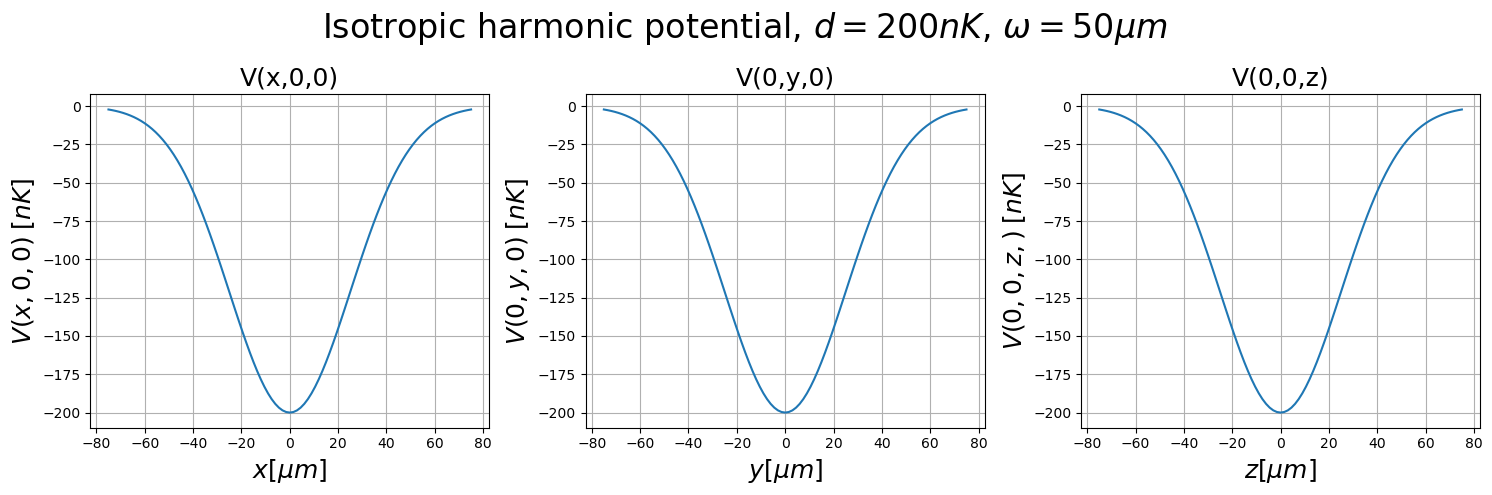

In [4]:
def harmonic_trap(
        x: Union[float, np.ndarray],
        y: Union[float, np.ndarray],
        z: Union[float, np.ndarray],
        trap_depth: float = 200,
        waist: float = 50,
    ) -> Union[float, np.ndarray]:
    """Return a harmonic trap potential in [k_B x nK] for given position(s) in [μm].
    
        Args:
            x, y, z: position in [μm]
            trap_depth: trap depth in [k_B x nK]. Defaults to 200nK.
            waist: region in which we can model the trap as harmonic is [-waist, waist] in [μm]. Defaults to 80μm.

        Returns:
            V(x, y, z): harmonic trap potential in [k_B x nK], array of same shape as x, y, z
    """
    r_squared = x**2 + y**2 + z**2
    gaussian_profile = np.exp(-2 * r_squared / waist**2)
    return -trap_depth * gaussian_profile

# Plot the harmonic trap potential along the x-axis, i.e. V(x,0,0)
x = np.linspace(-75, 75, 101) 
y = np.linspace(-75, 75, 101) 
z = np.linspace(-75, 75, 101) 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(r'Isotropic harmonic potential, $d=200nK$, $\omega=50 \mu m$', fontsize=24)

axs[0].plot(x, harmonic_trap(x,0,0))
axs[0].set_xlabel(r'$x[\mu m]$', fontsize=18)
axs[0].set_ylabel(r'$V(x,0,0) \; [nK]$', fontsize=18)
axs[0].set_title('V(x,0,0)', fontsize=18)
axs[0].grid(True)

axs[1].plot(x, harmonic_trap(0,y,0))
axs[1].set_xlabel(r'$y[\mu m]$', fontsize=18)
axs[1].set_ylabel(r'$V(0,y,0) \; [nK]$', fontsize=18)
axs[1].set_title('V(0,y,0)', fontsize=18)
axs[1].grid(True)

axs[2].plot(x, harmonic_trap(0,0,z))
axs[2].set_xlabel(r'$z[\mu m]$', fontsize=18)
axs[2].set_ylabel(r'$V(0,0,z,) \; [nK]$', fontsize=18)
axs[2].set_title('V(0,0,z)', fontsize=18)
axs[2].grid(True)

fig.tight_layout()

Let us now look at the spacial density of $N=200000$ sodium atoms in the harmonic trap for temperatures $T \in [0nK, 100nK]$. Note that here and also in all following calculations, we use the Thomas-Fermi approximation to update $n_0$ and the semiclassical Hartree Fock approximation to update the thermal density $n_{ex}$.

In [5]:
m = 3.8175405e-26               # mass of sodium atom in [kg]
a_s = 2.75e-9                   # s-wave scattering length of sodium in [m]
N_atoms = 200000                # Number of sodium atoms in the trap

x = np.linspace(-75, 75, 101) # x-axis in [μm]
y = np.linspace(-75, 75, 101) # y-axis in [μm]
z = np.linspace(-75, 75, 101) # z-axis in [μm]

Ts = np.linspace(0, 100, 11) * u.nK
na_becs = []
mu = None
for T in Ts:
    na_bec_harmonic = BEC(m, a_s, N_atoms, T, harmonic_trap, x=x, y=y, z=z, init_with_zero_T=False)
    if mu is not None:
        na_bec_harmonic.mu = mu # initialize mu with previous converged value
    na_bec_harmonic.eval_density(mu_change_rate=10)
    mu = na_bec_harmonic.mu
    na_becs.append(na_bec_harmonic)

  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 5 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 3 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 3 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 4 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 4 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 5 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 5 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 7 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 12 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 18 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 19 iterations.


First, let's plot the condensate fraction vs temperature to get an idea for the critical temperature

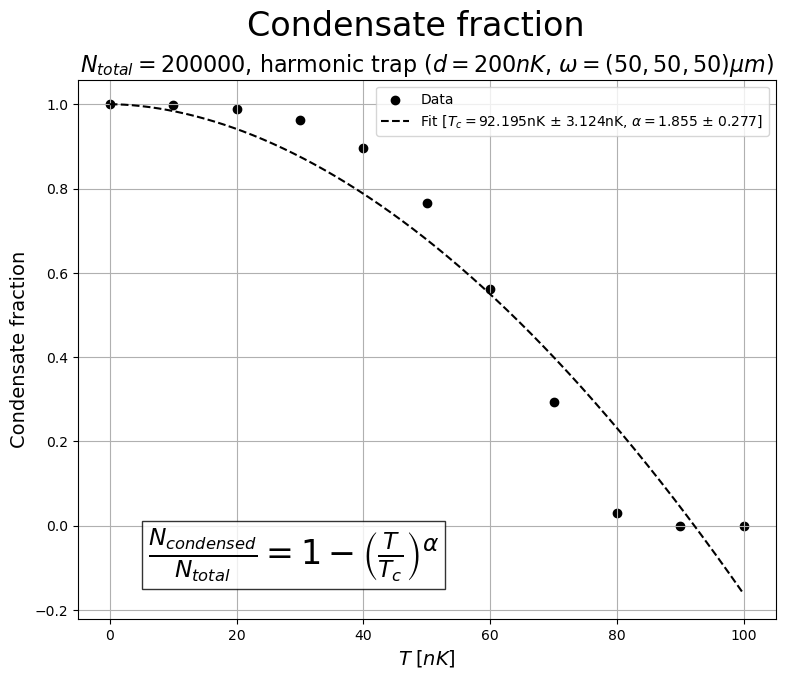

In [6]:
# Naive formula for condensate fraction (in case of non-interacting bosons)
def condens_frac(T, T_c, alpha):
    return 1 - (T / T_c)**alpha

initial_guess_fit_params = [95, 3]
condens_fracs = [na_bec.condensate_fraction for na_bec in na_becs]
popt, pcov = curve_fit(condens_frac, Ts.value, condens_fracs, p0=initial_guess_fit_params)
perr = np.sqrt(np.diag(pcov))
x_fit = np.linspace(Ts[0].value, Ts[-1].value, 1000)
y_fit = condens_frac(x_fit, *popt)

fig, axs = plt.subplots(1, 1, figsize=(9, 7))
fig.suptitle('Condensate fraction', fontsize=24)
axs.scatter(Ts, condens_fracs, c='k', marker='o', label='Data')
axs.plot(x_fit, y_fit, c='k', linestyle='--', label=r'Fit [$T_c=$%.3fnK $\pm$ %.3fnK, $\alpha=$%.3f $\pm$ %.3f]'\
                                                      % (popt[0], perr[0], popt[1], perr[1]))
axs.set_xlabel(r'$T \; \left[ nK \right]$', fontsize=14)
axs.set_ylabel(r'Condensate fraction', fontsize=14)
axs.set_title(r'$N_{total}=200000$, harmonic trap ($d=200nK$, $\omega=(50, 50, 50) \mu m$)', fontsize=16)
axs.legend(fontsize=10)
axs.grid(True)
t = axs.text(0.1, 0.1, r'$\frac{N_{condensed}}{N_{total}} = 1 - \left( \frac{T}{T_c} \right)^{\alpha}$', transform=plt.gca().transAxes,
         fontsize=24, color='black', bbox=dict(facecolor='white', alpha=0.8))

The formula does not fit very good, which is probably because the last two points are already becond the critical temperature, a region not covered by this formula and also it could be because the formula is intended for non-iteracting bosons, whereas we have weakly interacting bosons here.

Let us next look at the convergence history, 1d density plots and 2d density plots for different temperatures. We start with $T=0$.

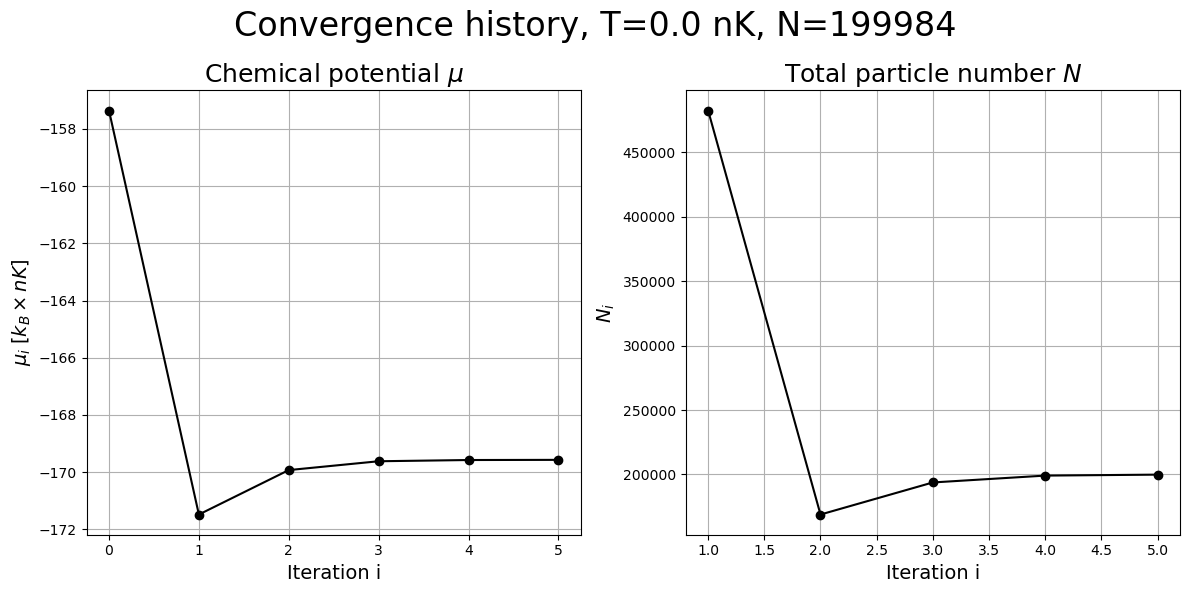

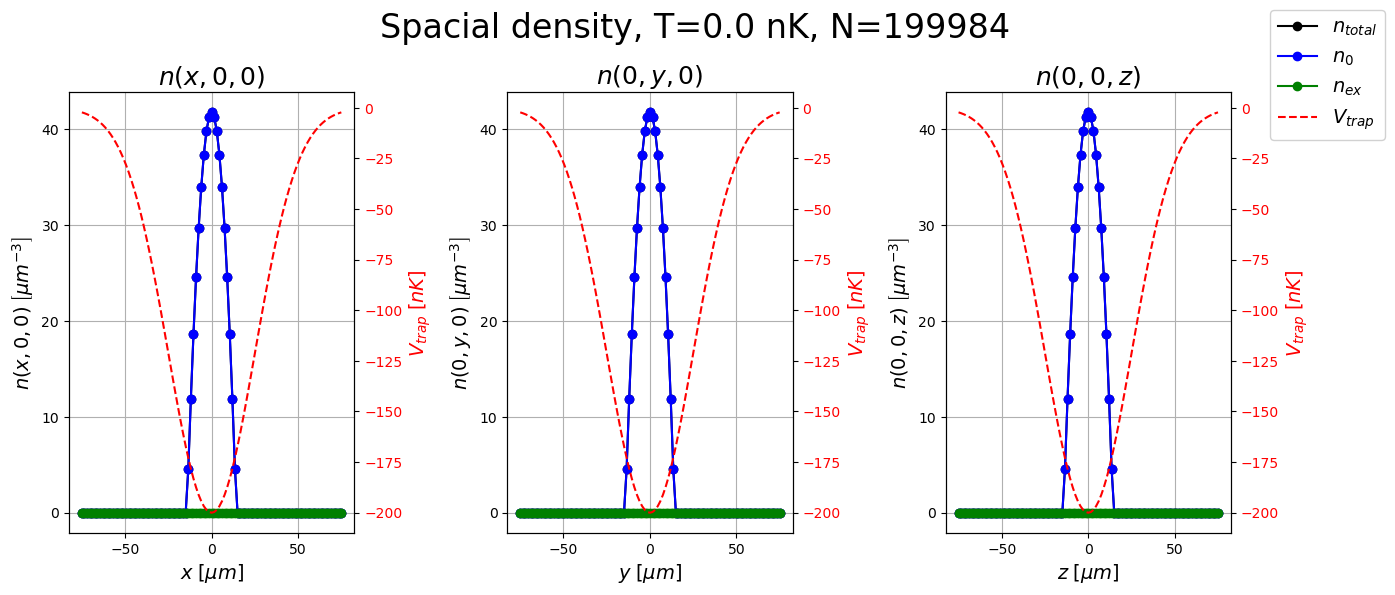

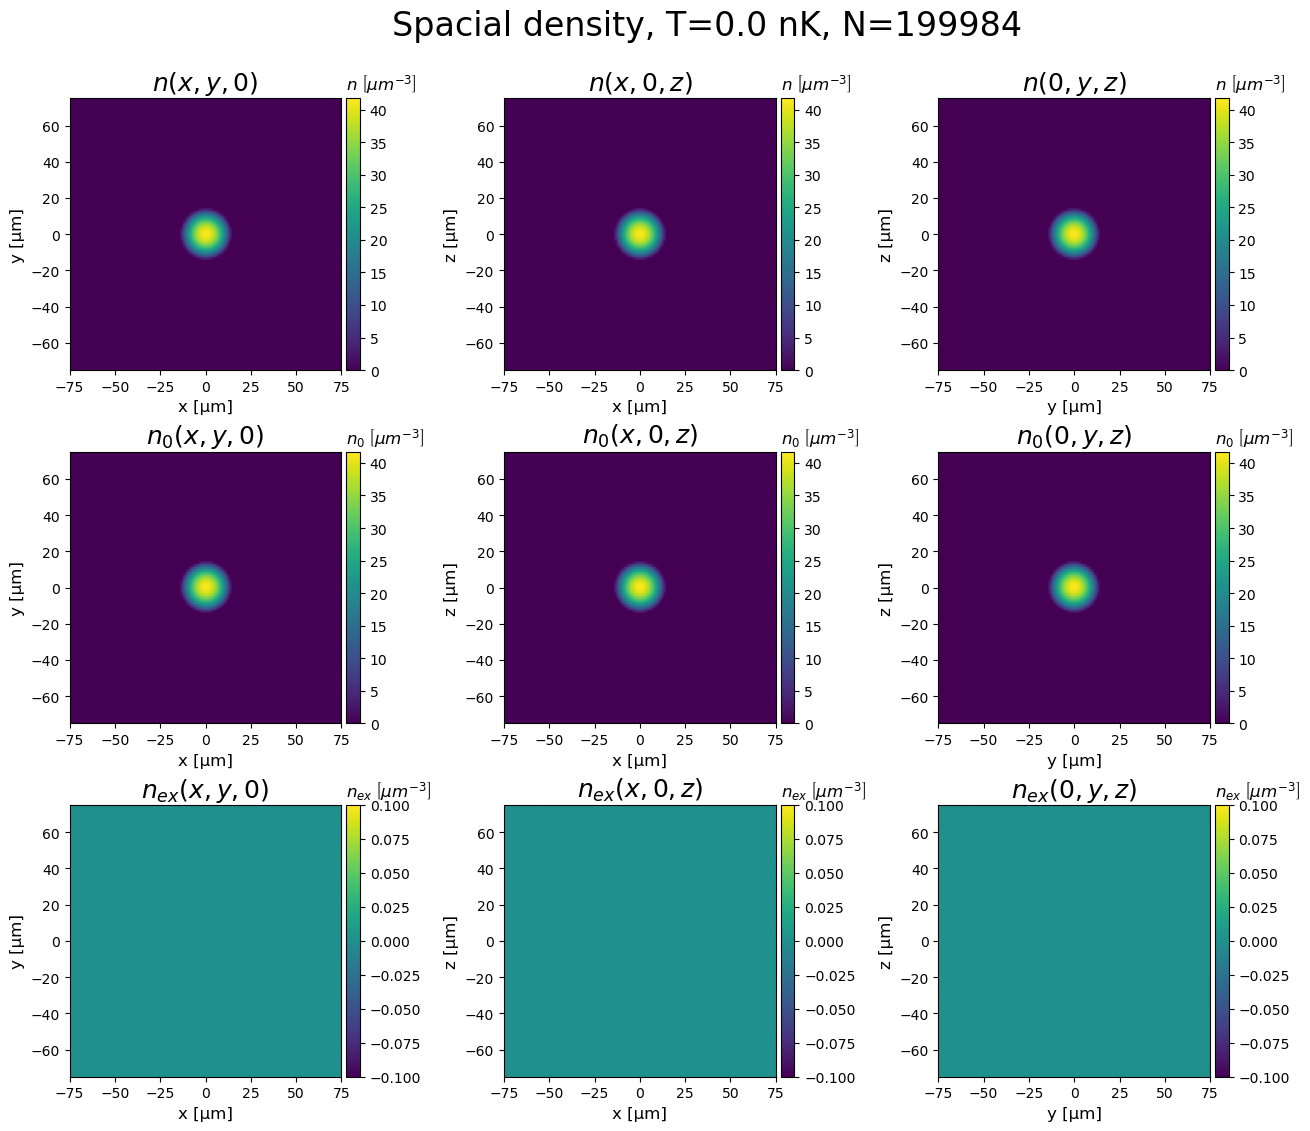

In [7]:
a = na_becs[0].plot_convergence_history()
b = na_becs[0].plot_density_1d()
c = na_becs[0].plot_density_2d()

This gives the expected condensate peak. Let us next exemplarily look at $T=70nK$ since it seems to have roughly 50% condensate fraction.

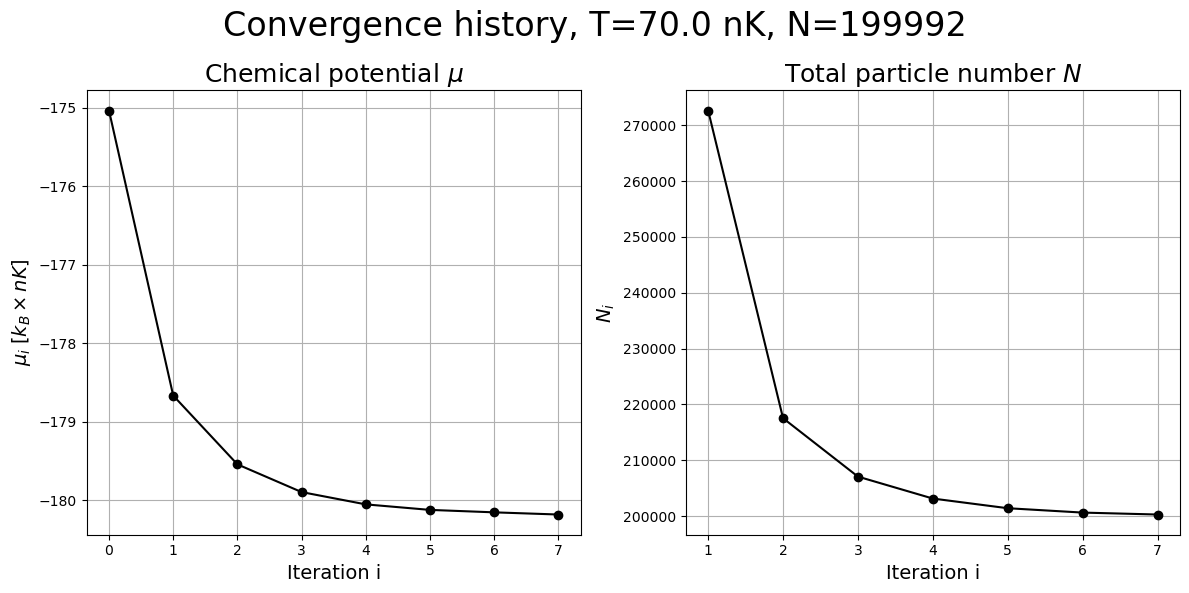

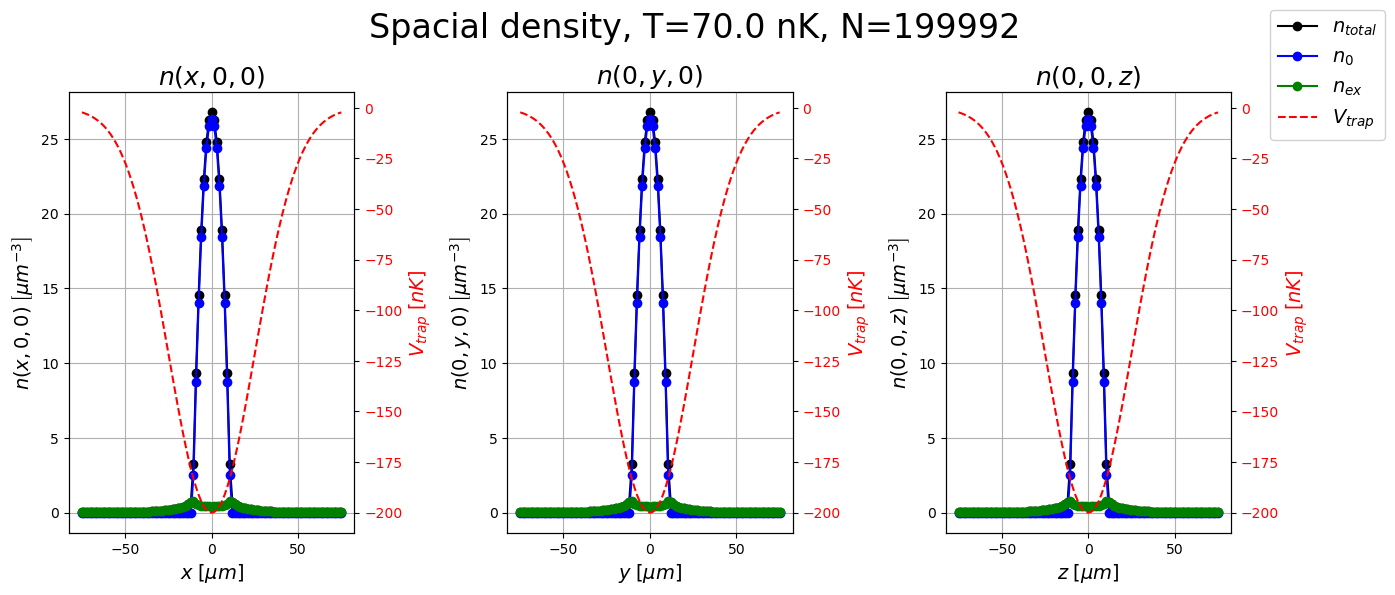

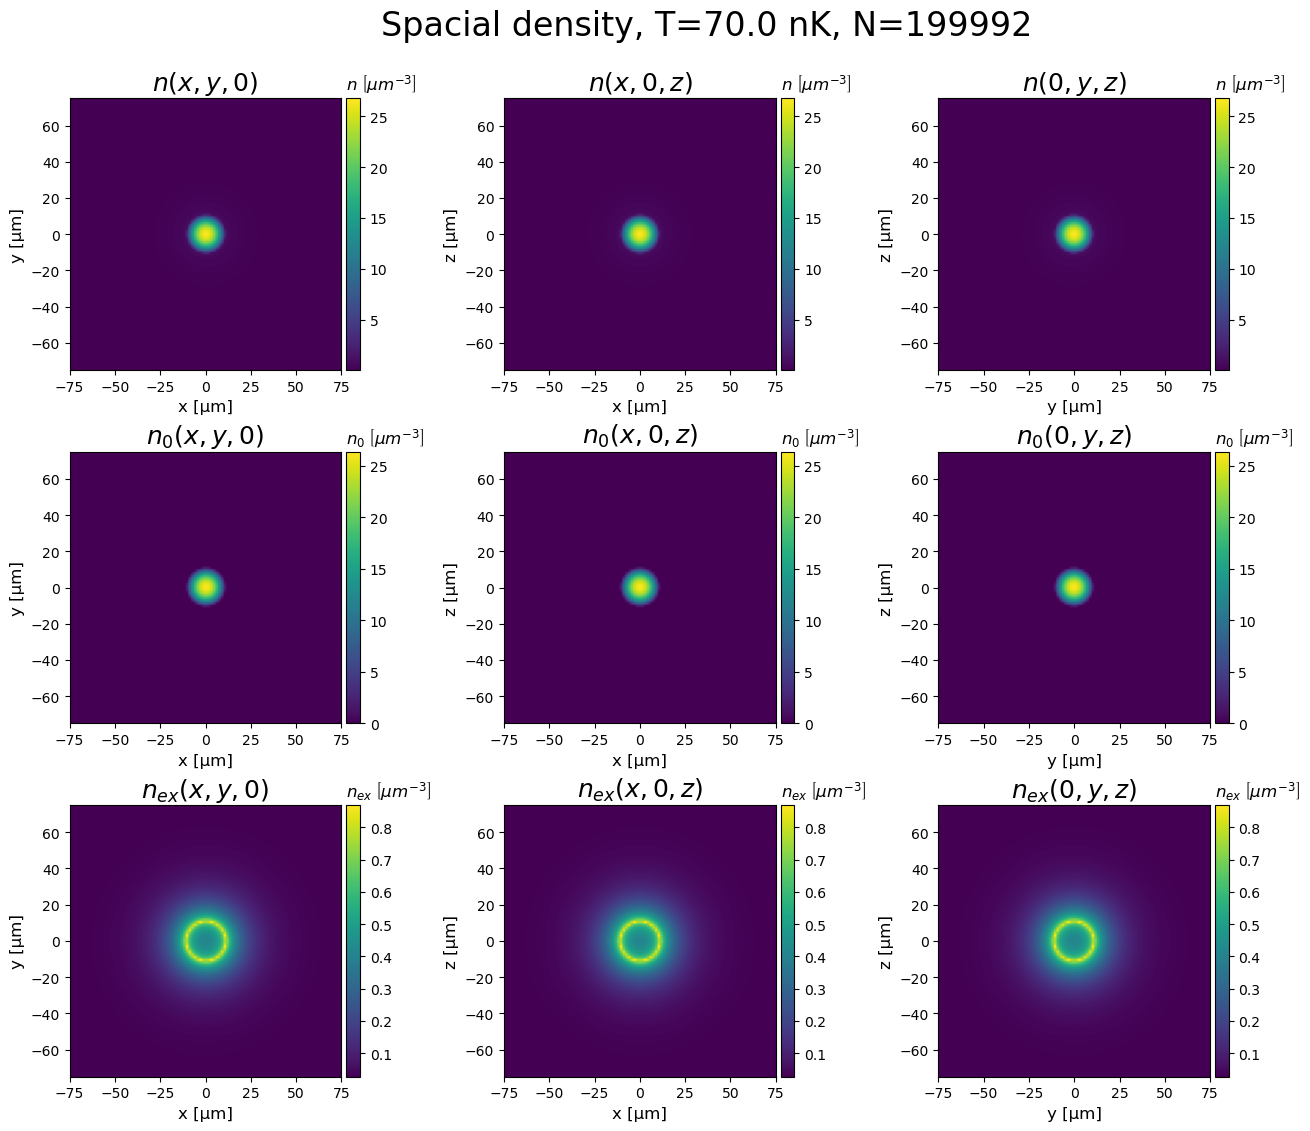

In [8]:
a = na_becs[7].plot_convergence_history()
b = na_becs[7].plot_density_1d()
c = na_becs[7].plot_density_2d()

Apparently, the thermal density gets depleted by the condensate and forms a "Gaussian ring" around it. Let us finally take a look at $T=100nK$ which is above the critical temperature.

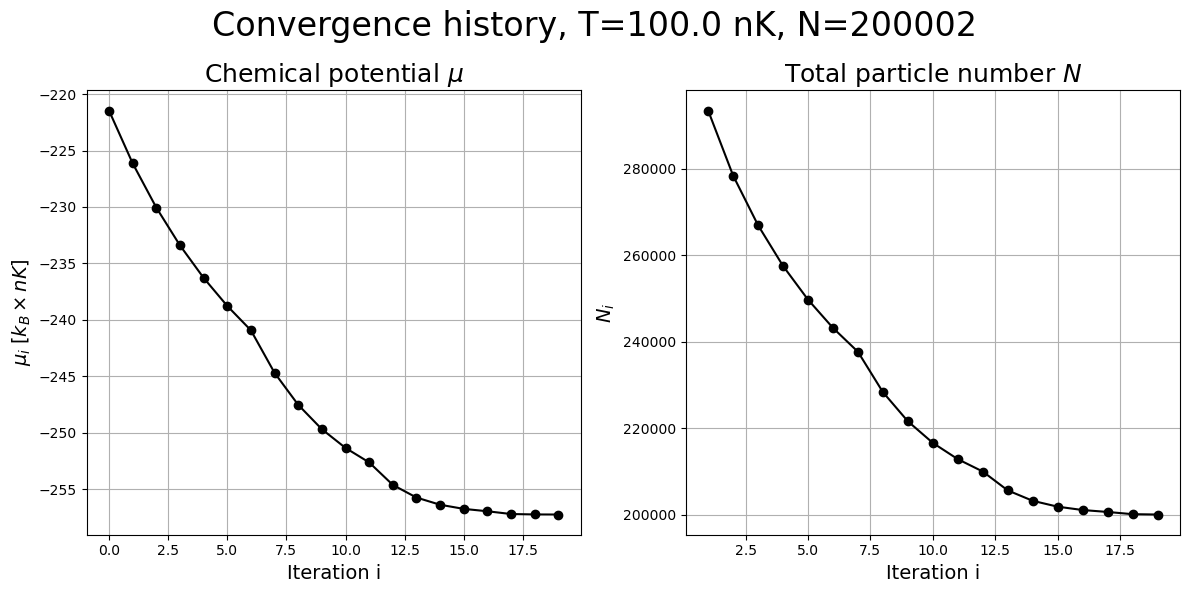

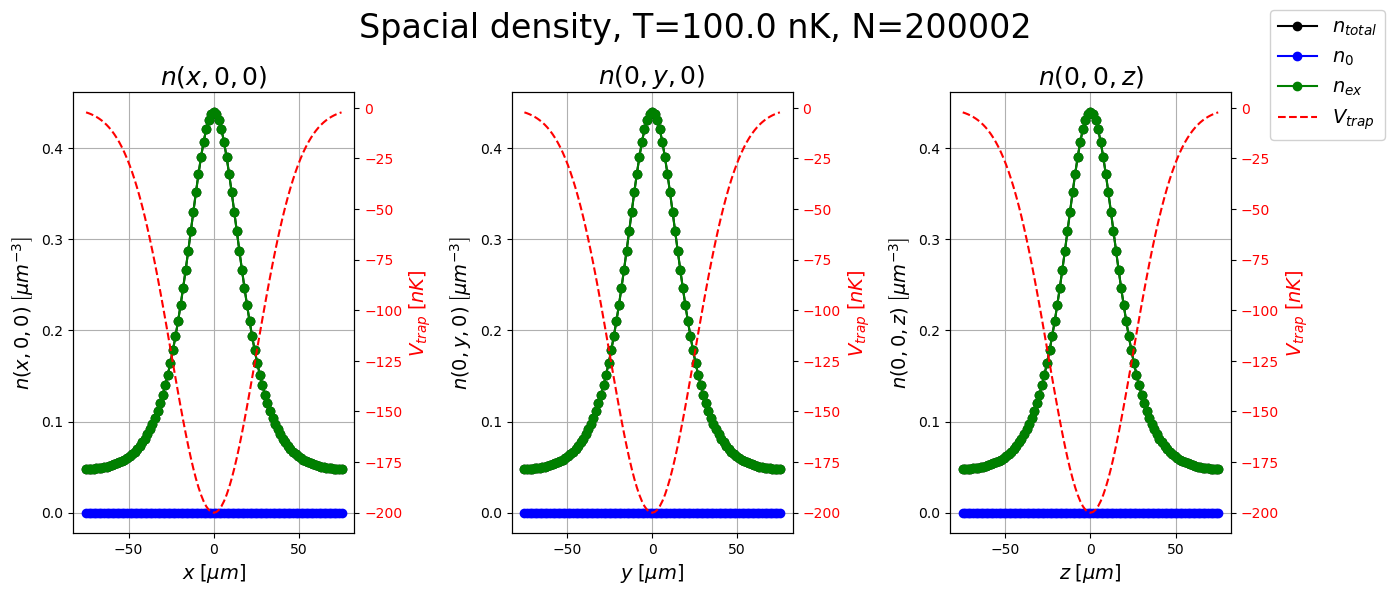

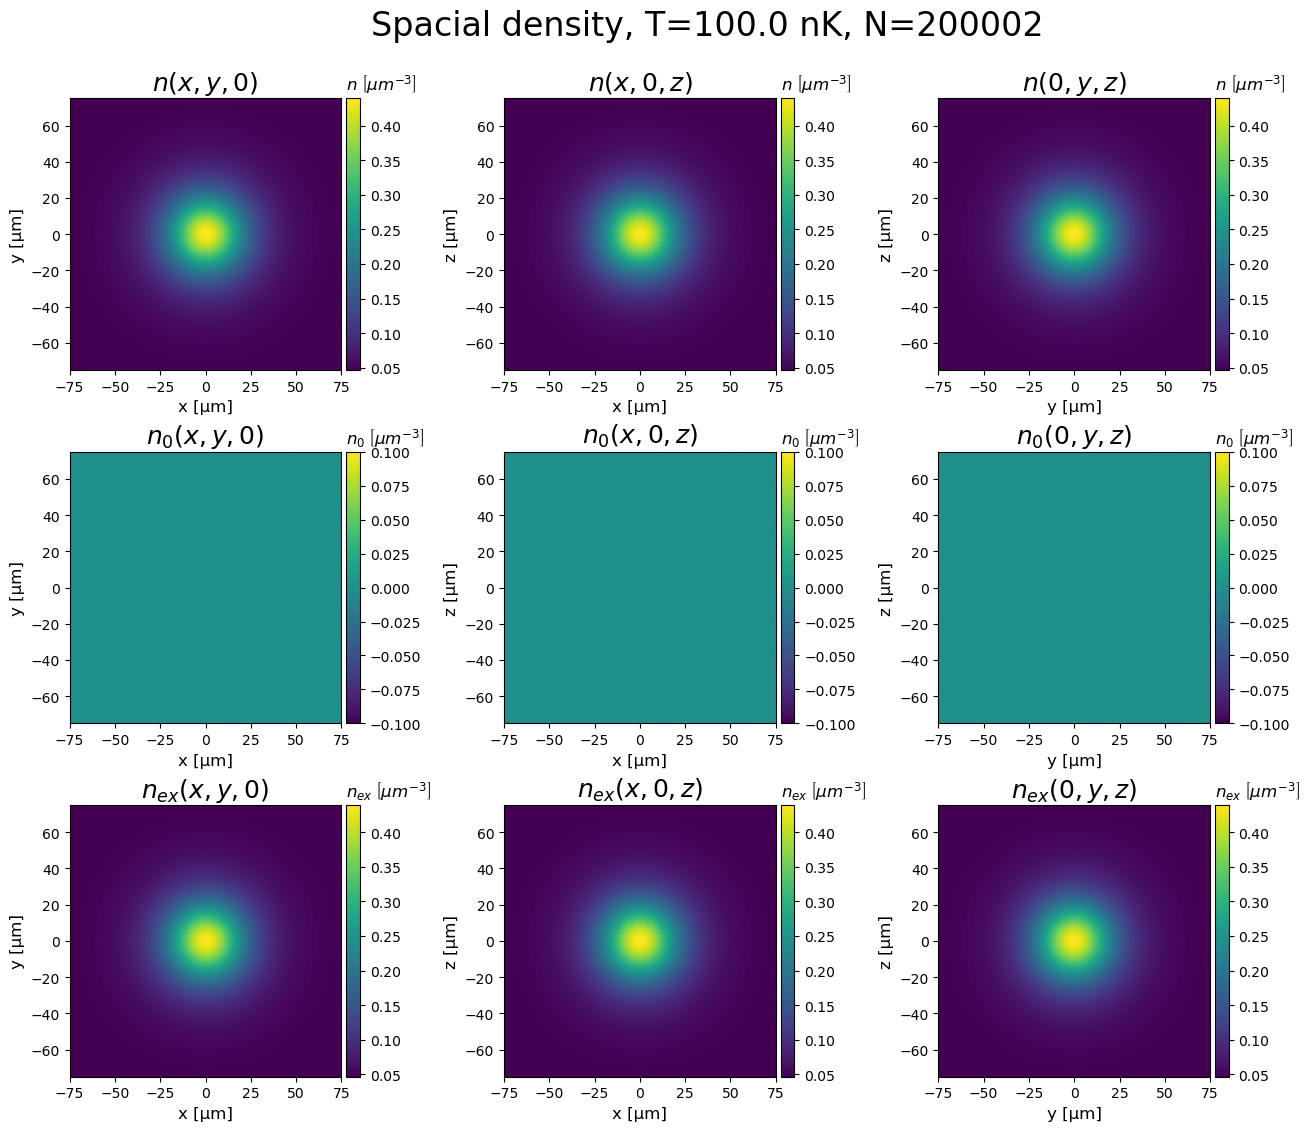

In [9]:
a = na_becs[-1].plot_convergence_history()
b = na_becs[-1].plot_density_1d()
c = na_becs[-1].plot_density_2d()

The thermal density has a Gaussian shape, but significantly broader than the condensate peak we saw earlier at zero temperature. Actually, the spacial region of $[-75\mu m, 75\mu m]$ in each direction is too small here and the thermal density is even broader and less peaked compared to what we see here coming from enforcing the normalization condition on this confined space when in reality it should be enforced on the entire space!

<h3>Let's now look at the box trap potential we want to implement!</h3>

<h3>First a perfect box</h3>

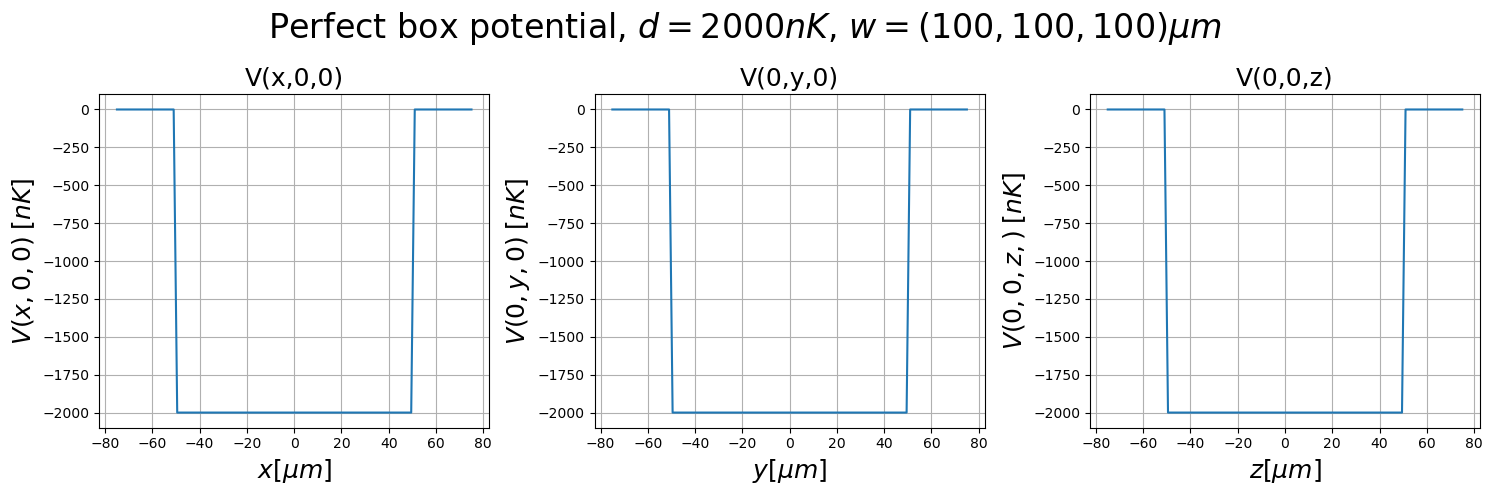

In [10]:
def perfect_box(
        x: Union[float, np.ndarray],
        y: Union[float, np.ndarray],
        z: Union[float, np.ndarray],
        box_depth: float = 2000.,
        box_width: Tuple[float] = (100., 100., 100.),
) -> Union[float, np.ndarray]:
    """Return a perfect box potential of depth `box_depth` in [k_B x nK] for given position(s) in [μm].
       The size of the box in each direction around 0 is given by `box_width` in [μm].
    
        Args:
            x, y, z: position in [μm]
            box_depth: box depth in [k_B x nK]. Defaults to 2000nK.
            box_width: region [-box_width/2 μm, box_width/2 μm] is -`box_depth`nK, else potential is 0nK.
                       Defaults to (100, 100, 100)μm.

        Returns:
            V(x, y, z): box potential in [k_B x nK], array of same shape as x, y, z
    """
    # Check if the positions are within the box
    in_box = (np.abs(x) <= box_width[0] / 2) & \
             (np.abs(y) <= box_width[1] / 2) & \
             (np.abs(z) <= box_width[2] / 2)

    # Apply the potential: -box_depth inside the box, 0 outside
    return np.where(in_box, -box_depth, 0.)

x = np.linspace(-75, 75, 101) 
y = np.linspace(-75, 75, 101) 
z = np.linspace(-75, 75, 101) 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(r'Perfect box potential, $d=2000nK$, $w=(100, 100, 100) \mu m$', fontsize=24)

axs[0].plot(x, perfect_box(x,0,0))
axs[0].set_xlabel(r'$x[\mu m]$', fontsize=18)
axs[0].set_ylabel(r'$V(x,0,0) \; [nK]$', fontsize=18)
axs[0].set_title('V(x,0,0)', fontsize=18)
axs[0].grid(True)

axs[1].plot(x, perfect_box(0,y,0))
axs[1].set_xlabel(r'$y[\mu m]$', fontsize=18)
axs[1].set_ylabel(r'$V(0,y,0) \; [nK]$', fontsize=18)
axs[1].set_title('V(0,y,0)', fontsize=18)
axs[1].grid(True)

axs[2].plot(x, perfect_box(0,0,z))
axs[2].set_xlabel(r'$z[\mu m]$', fontsize=18)
axs[2].set_ylabel(r'$V(0,0,z,) \; [nK]$', fontsize=18)
axs[2].set_title('V(0,0,z)', fontsize=18)
axs[2].grid(True)

fig.tight_layout()

Let's now calculate the density in the perfect box for $N=200000$ sodium atoms at temperatures $T \in [0nK, 25nK]$

In [11]:
m = 3.8175405e-26               # mass of sodium atom in [kg]
a_s = 2.75e-9                   # s-wave scattering length of sodium in [m]
N_atoms = 200000                # Number of sodium atoms in the trap

x = np.linspace(-75, 75, 101) # x-axis in [μm]
y = np.linspace(-75, 75, 101) # y-axis in [μm]
z = np.linspace(-75, 75, 101) # z-axis in [μm]

Ts = np.linspace(0, 25, 11) * u.nK
na_becs = []
mu = None
for T in Ts:
    na_bec = BEC(m, a_s, N_atoms, T, perfect_box, x=x, y=y, z=z, init_with_zero_T=False)
    if mu != None:
        na_bec.mu = mu # initialize mu with previous converged value
    na_bec.eval_density()
    mu = na_bec.mu
    na_becs.append(na_bec)

  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 24 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/lelo/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Convergence reached after 17 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 18 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 18 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 19 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 19 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 19 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 19 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 18 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 21 iterations.


  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 41 iterations.


We again start with plotting the condensate fraction vs temperature to get an idea for the critical temperature

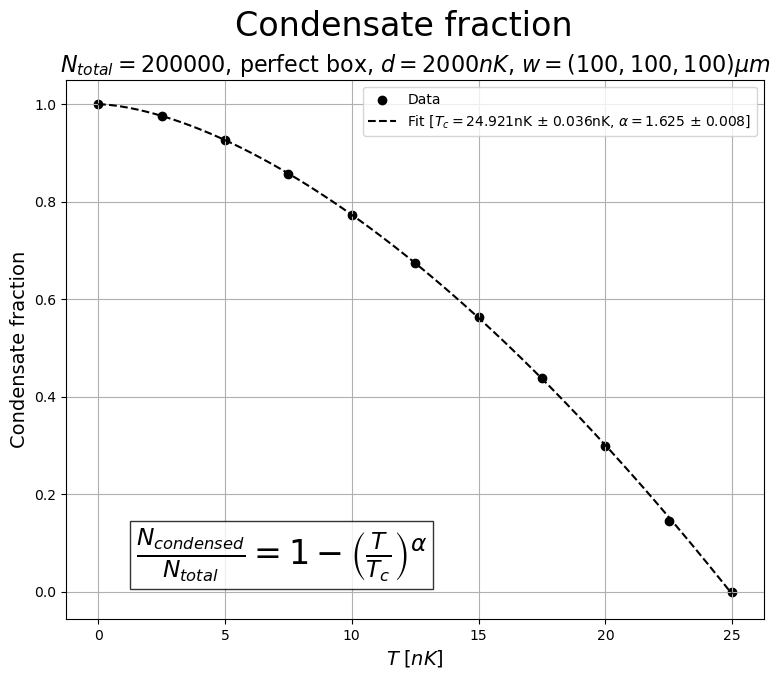

In [12]:
# Naive formula for condensate fraction (in case of non-interacting bosons)
def condens_frac(T, T_c, alpha):
    return 1 - (T / T_c)**alpha

initial_guess_fit_params = [28, 3/2]
condens_fracs = [na_bec.condensate_fraction for na_bec in na_becs]
popt, pcov = curve_fit(condens_frac, Ts.value, condens_fracs, p0=initial_guess_fit_params)
perr = np.sqrt(np.diag(pcov))
x_fit = np.linspace(Ts[0].value, Ts[-1].value, 1000)
y_fit = condens_frac(x_fit, *popt)

fig, axs = plt.subplots(1, 1, figsize=(9, 7))
fig.suptitle('Condensate fraction', fontsize=24)
axs.scatter(Ts, condens_fracs, c='k', marker='o', label='Data')
axs.plot(x_fit, y_fit, c='k', linestyle='--', label=r'Fit [$T_c=$%.3fnK $\pm$ %.3fnK, $\alpha=$%.3f $\pm$ %.3f]'\
                                                      % (popt[0], perr[0], popt[1], perr[1]))
axs.set_xlabel(r'$T \; \left[ nK \right]$', fontsize=14)
axs.set_ylabel(r'Condensate fraction', fontsize=14)
axs.set_title(r'$N_{total}=200000$, perfect box, $d=2000nK$, $w=(100,100,100)\mu m$', fontsize=16)
axs.legend(fontsize=10)
axs.grid(True)
t = axs.text(0.1, 0.1, r'$\frac{N_{condensed}}{N_{total}} = 1 - \left( \frac{T}{T_c} \right)^{\alpha}$', transform=plt.gca().transAxes,
         fontsize=24, color='black', bbox=dict(facecolor='white', alpha=0.8))

This look a bit worrisom. Before in the harmonic depth, the critical temperature was above $T_c=90nK$ at a trap depth of $d=200nK$, so almost half the trap depth. But here now for the box trap, the critical temperature is only roughly $T_c=25nK$ at a trap depth of $d=2000nK$, so the trap depth is about 20 times larger than the critical temperature for the box trap!

Let's now look at the density at $T=0nK$.

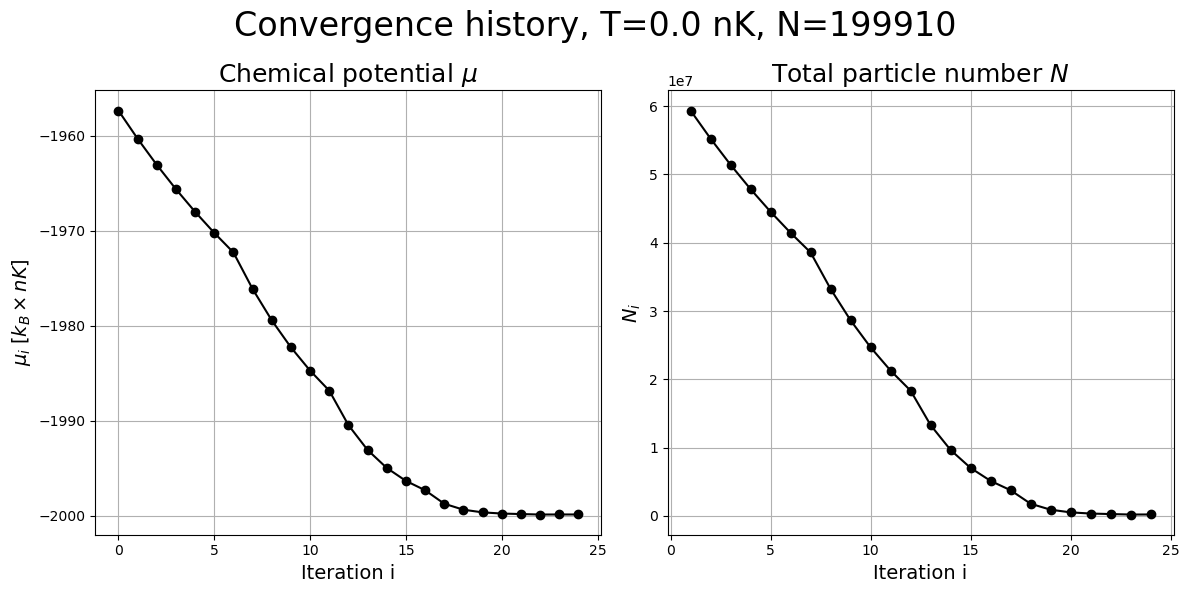

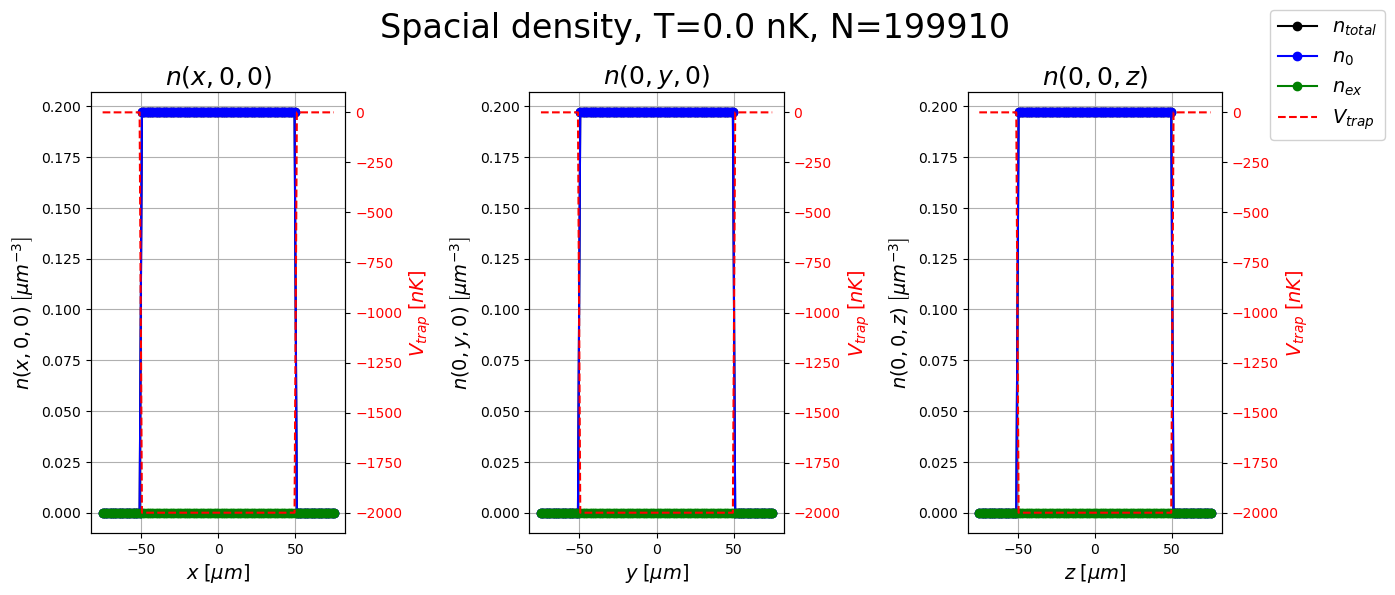

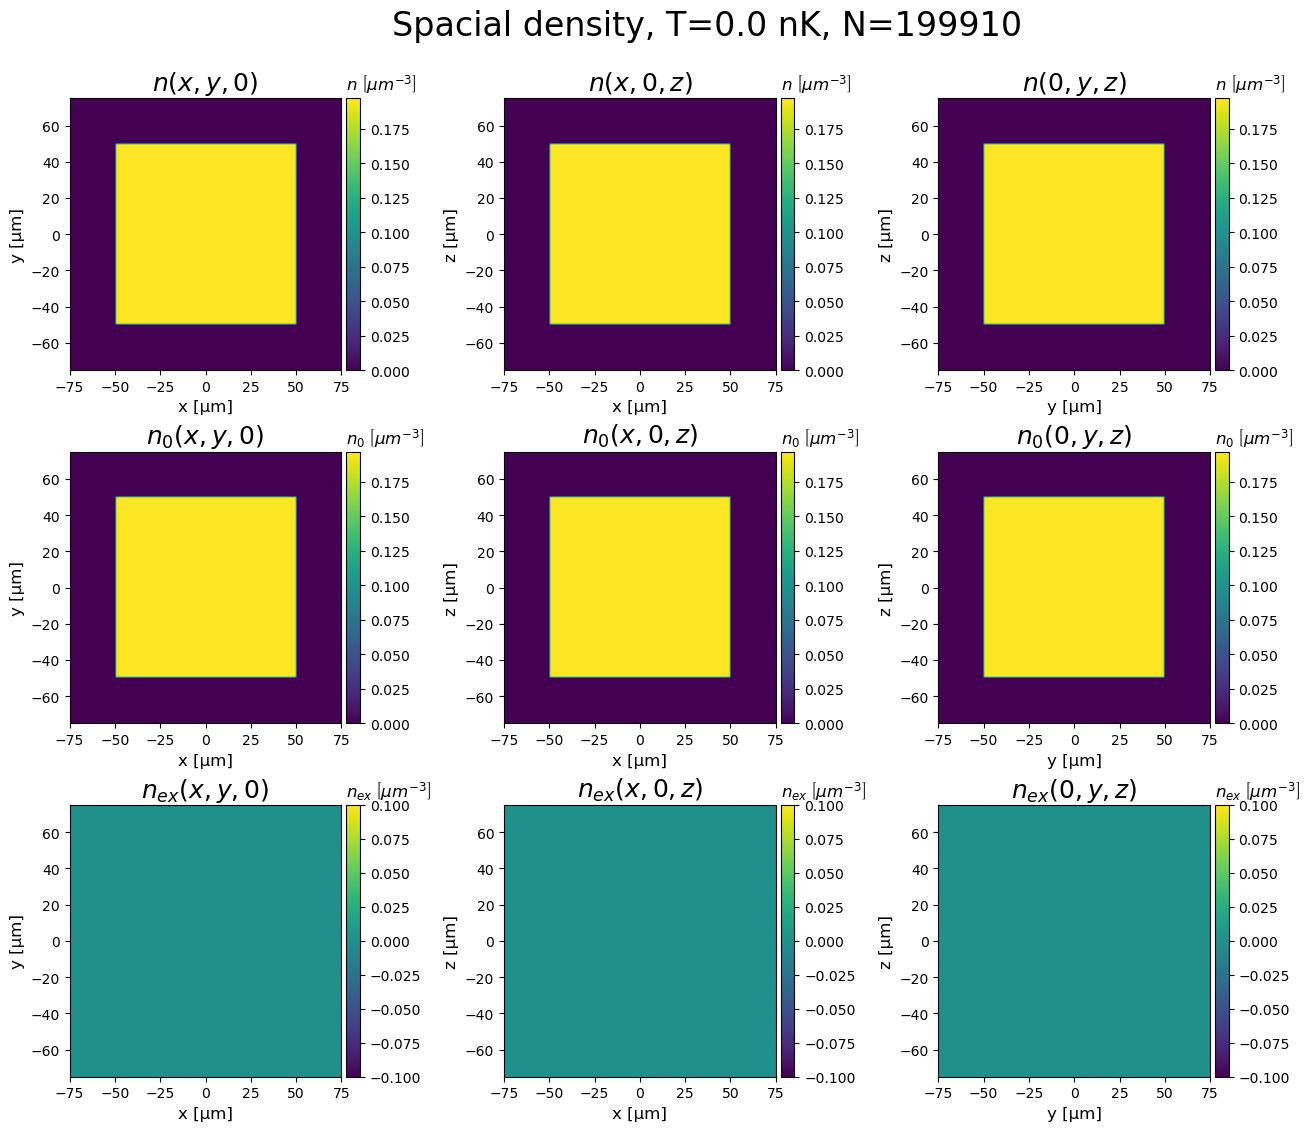

In [13]:
a = na_becs[0].plot_convergence_history()
b = na_becs[0].plot_density_1d()
c = na_becs[0].plot_density_2d()

This looks fine, just as expected a uniform density in the perfectly homogeneous trap. Let's further look at $T=17.5nK$, where the condensate fraction is roughly 50%.

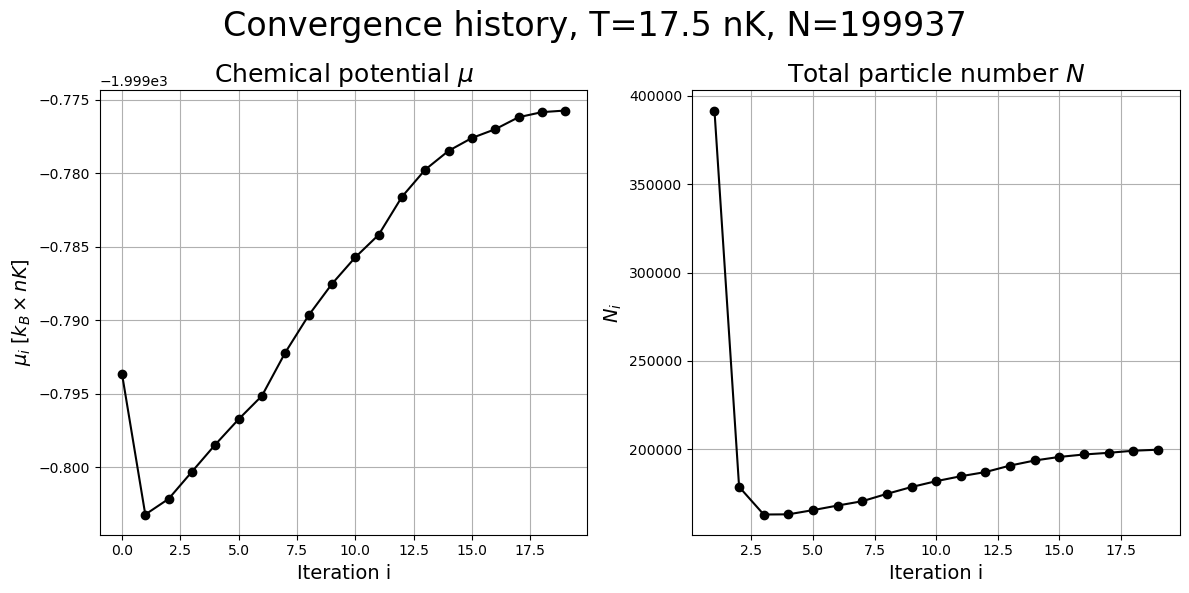

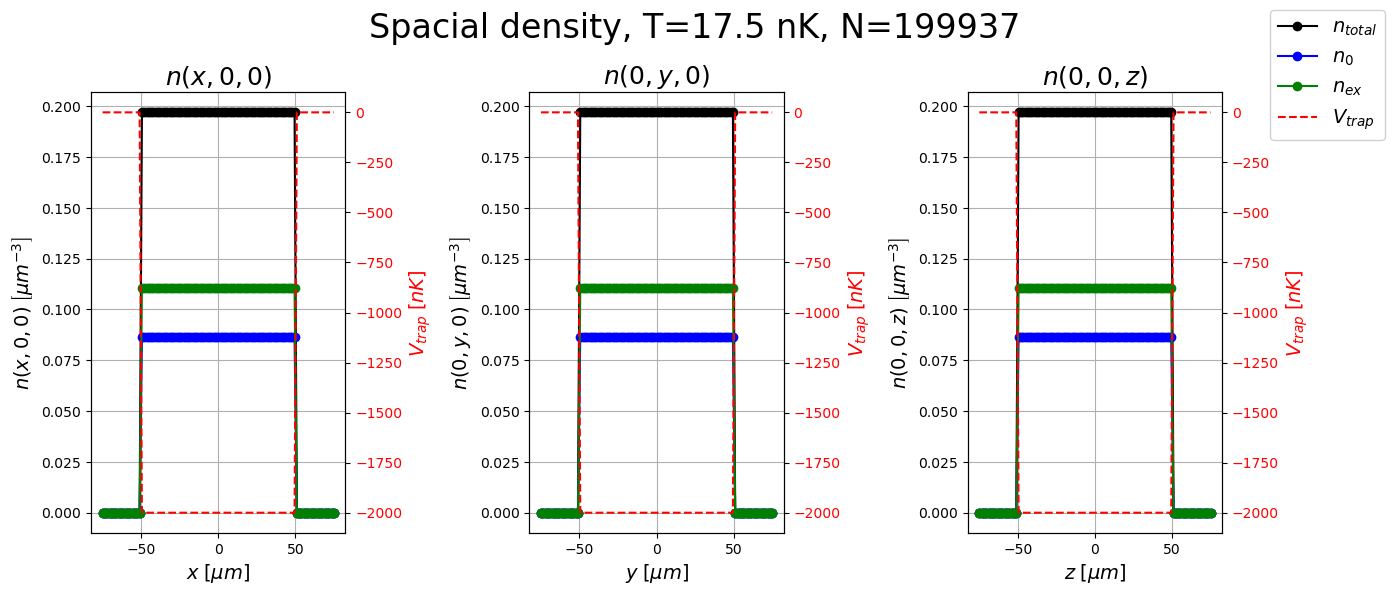

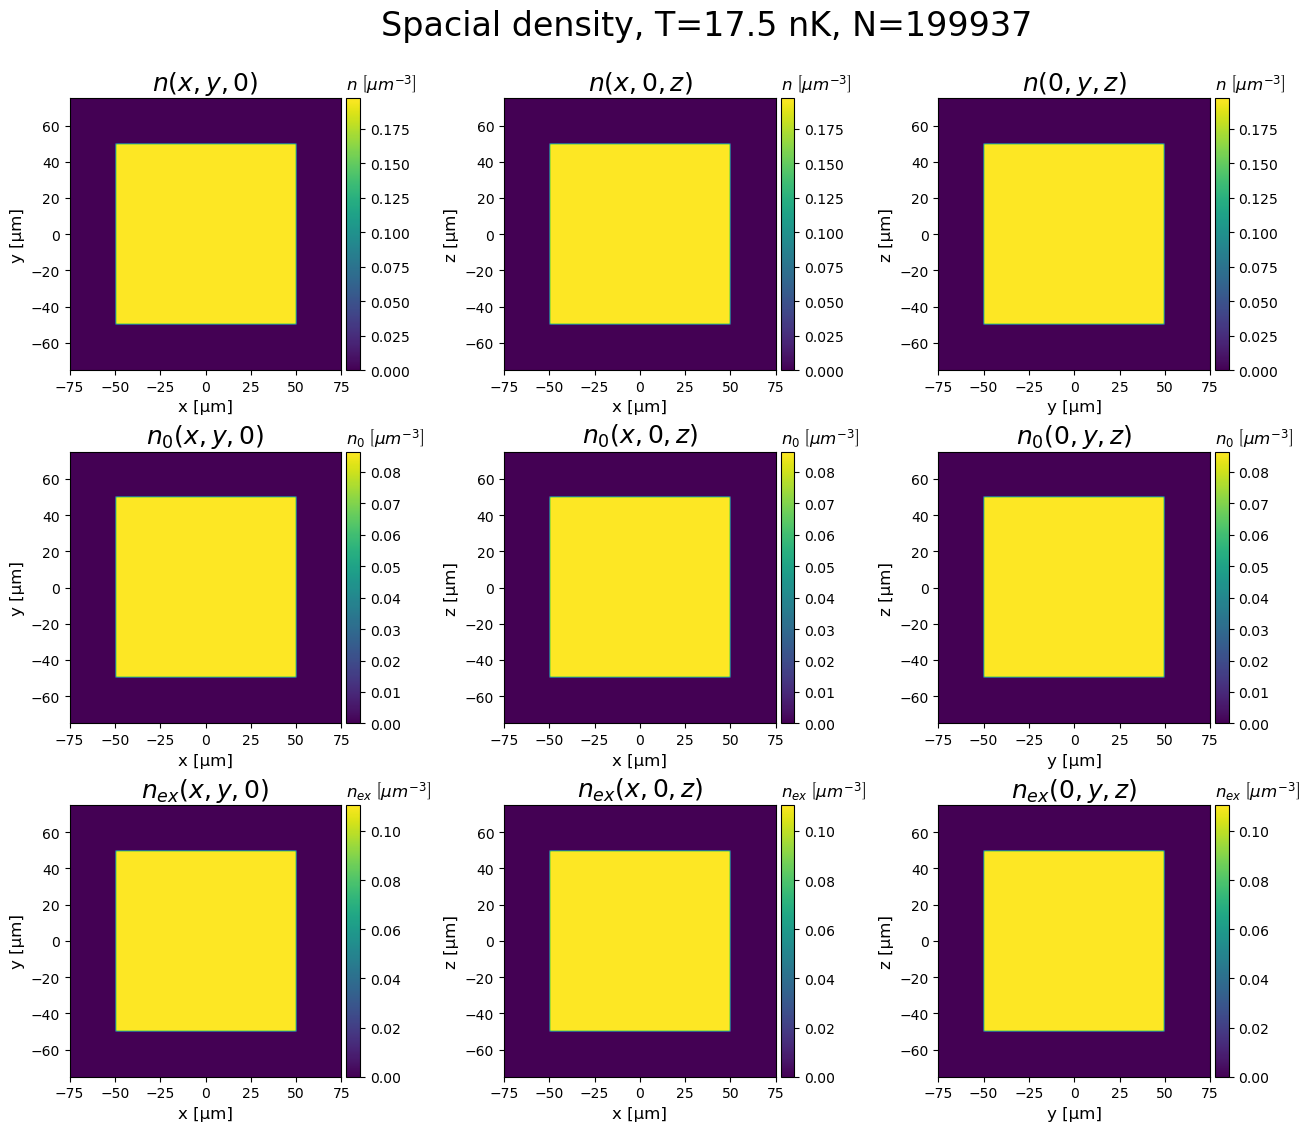

In [14]:
a = na_becs[7].plot_convergence_history()
b = na_becs[7].plot_density_1d()
c = na_becs[7].plot_density_2d()

So, at finite temperature below the critical one, we get a uniform condensate- and thermal density, no depletion is apparent. Let's finally look at $T=25nK$, where the condensate fraction is 0.

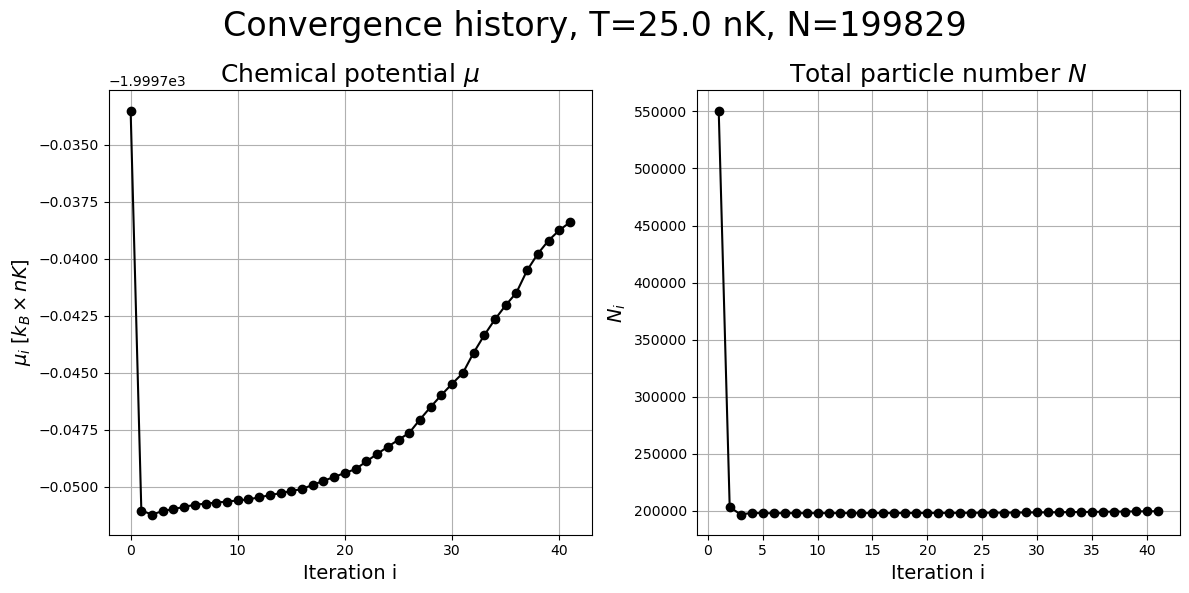

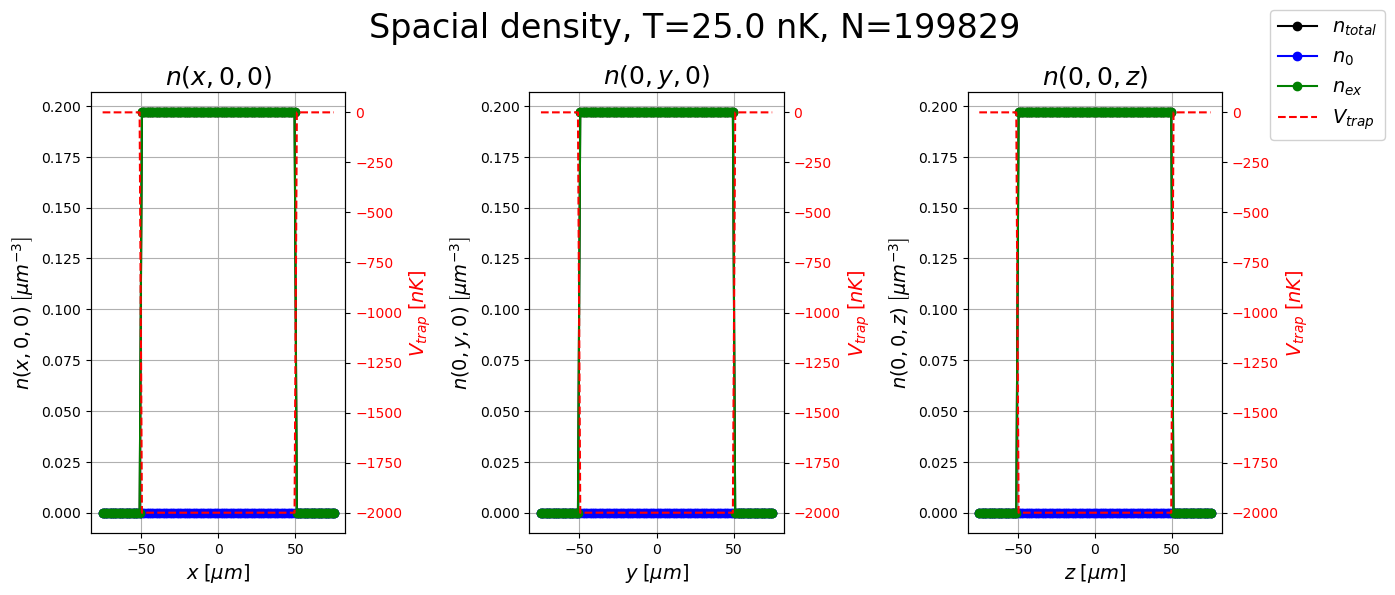

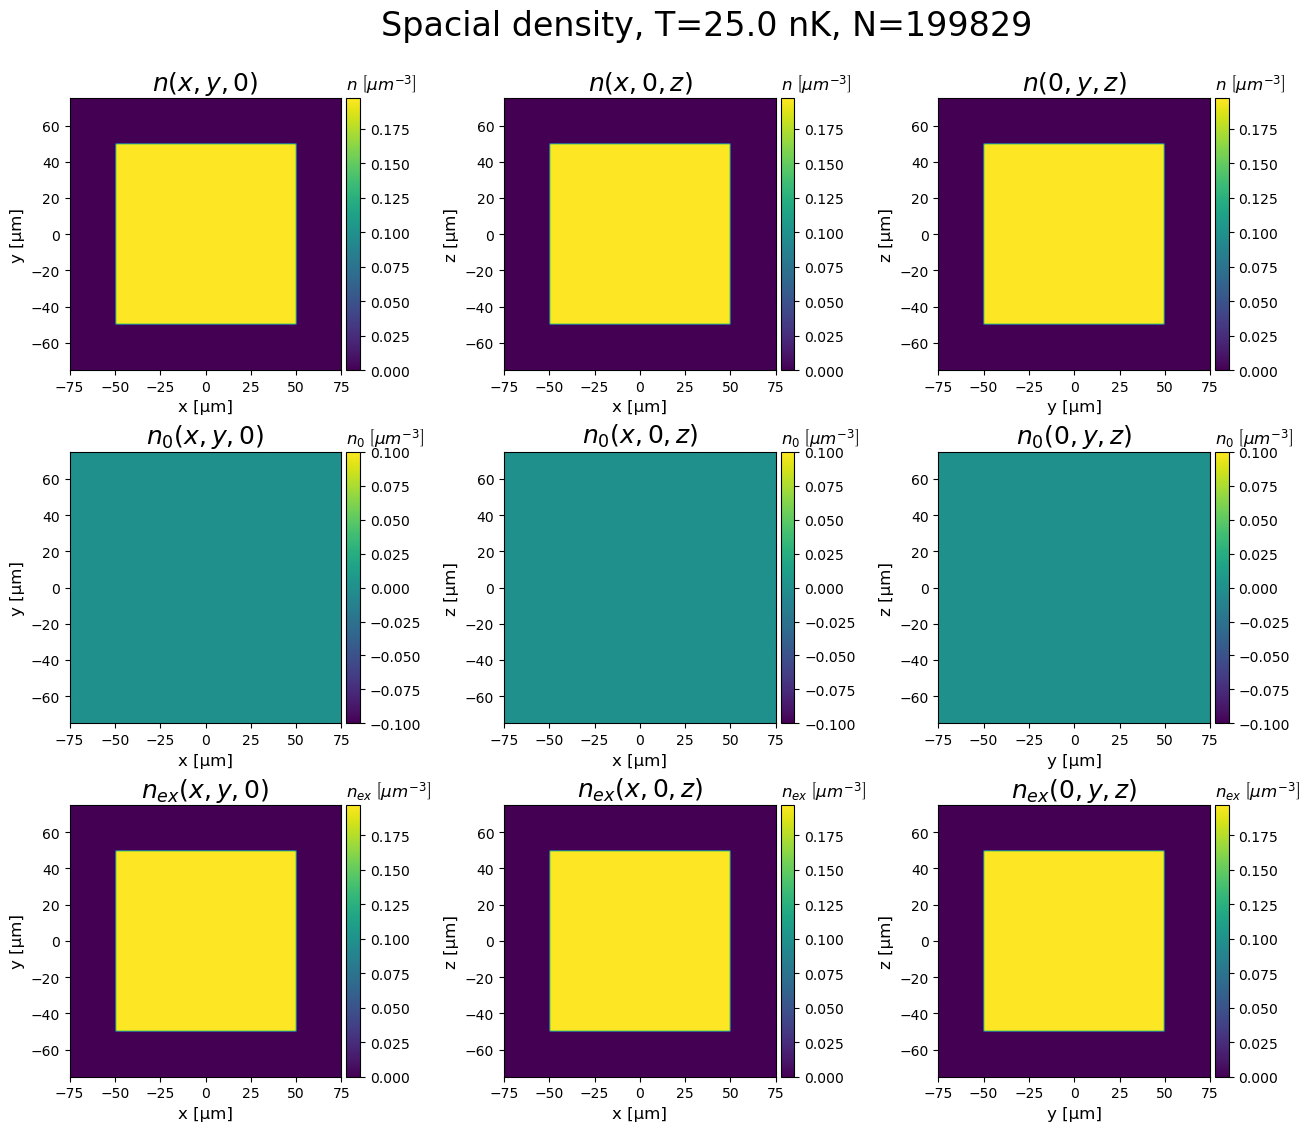

In [15]:
a = na_becs[-1].plot_convergence_history()
b = na_becs[-1].plot_density_1d()
c = na_becs[-1].plot_density_2d()

Look's also just as one would expect, with a uniform thermal density very much confined spacially to the box. 

<h3>Imperfect box</h3>

Next, we put some noise on the perfect box potential to see how it disturbs the uniformity of the density! Let's just put a rondom fluctuation on each spatial grid vlaue of the box trapping potential, that is at most 1% of the maximum absolut value of the potential, so 1% inhomogenity.

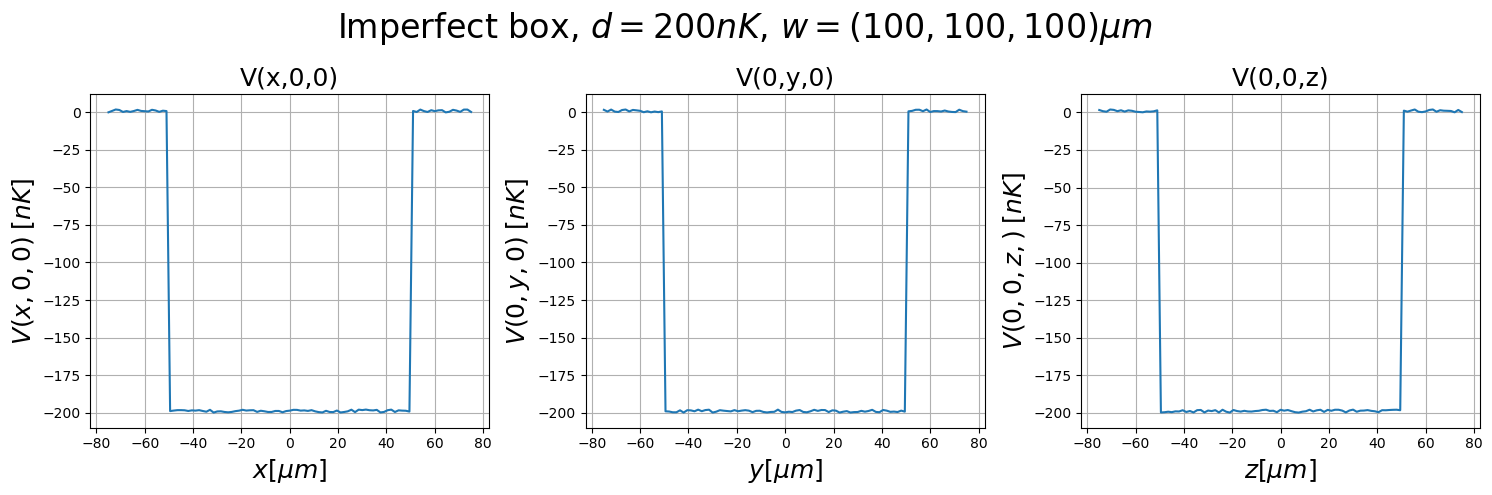

In [14]:
def imperfect_box(
        x: Union[float, np.ndarray],
        y: Union[float, np.ndarray],
        z: Union[float, np.ndarray],
        box_depth: float = 200.,
        box_width: Tuple[float] = (100., 100., 100.),
        inhomogenity: float = 0.01
) -> Union[float, np.ndarray]:
    """Return a perfect box potential of depth `box_depth` in [k_B x nK] for given position(s) in [μm].
       The size of the box in each direction around 0 is given by `box_width` in [μm].
    
        Args:
            x, y, z: position in [μm]
            box_depth: box depth in [k_B x nK]. Defaults to 2000nK.
            box_width: region [-box_width/2 μm, box_width/2 μm] is -`box_depth`nK, else potential is 0nK.
                       Defaults to (100, 100, 100)μm.
            inhomogenity: This number times `box_depth` gives the noise magnitude.

        Returns:
            V(x, y, z): box potential in [k_B x nK], array of same shape as x, y, z
    """
    # Check if the positions are within the box
    in_box = (np.abs(x) <= box_width[0] / 2) & \
             (np.abs(y) <= box_width[1] / 2) & \
             (np.abs(z) <= box_width[2] / 2)

    # Apply the potential: -box_depth inside the box, 0 outside
    perfect_box = np.where(in_box, -box_depth, 0.)
    noise = np.random.rand(*perfect_box.shape) * inhomogenity * box_depth
    return perfect_box + noise


x = np.linspace(-75, 75, 101) 
y = np.linspace(-75, 75, 101) 
z = np.linspace(-75, 75, 101) 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(r'Imperfect box, $d=200nK$, $w=(100, 100, 100) \mu m$', fontsize=24)

axs[0].plot(x, imperfect_box(x,0,0))
axs[0].set_xlabel(r'$x[\mu m]$', fontsize=18)
axs[0].set_ylabel(r'$V(x,0,0) \; [nK]$', fontsize=18)
axs[0].set_title('V(x,0,0)', fontsize=18)
axs[0].grid(True)

axs[1].plot(x, imperfect_box(0,y,0))
axs[1].set_xlabel(r'$y[\mu m]$', fontsize=18)
axs[1].set_ylabel(r'$V(0,y,0) \; [nK]$', fontsize=18)
axs[1].set_title('V(0,y,0)', fontsize=18)
axs[1].grid(True)

axs[2].plot(x, imperfect_box(0,0,z))
axs[2].set_xlabel(r'$z[\mu m]$', fontsize=18)
axs[2].set_ylabel(r'$V(0,0,z,) \; [nK]$', fontsize=18)
axs[2].set_title('V(0,0,z)', fontsize=18)
axs[2].grid(True)

fig.tight_layout()

In [16]:
m = 3.8175405e-26               # mass of sodium atom in [kg]
a_s = 2.75e-9                   # s-wave scattering length of sodium in [m]
N_atoms = 200000                # Number of sodium atoms in the trap

x = np.linspace(-75, 75, 101) # x-axis in [μm]
y = np.linspace(-75, 75, 101) # y-axis in [μm]
z = np.linspace(-75, 75, 101) # z-axis in [μm]

#Ts = np.linspace(0, 50, 11) * u.nK
Ts = [25] * u.nK
na_becs = []
mu = None
for T in Ts:
    na_bec = BEC(m, a_s, N_atoms, T, imperfect_box, x=x, y=y, z=z, init_with_zero_T=True)
    if mu != None:
        na_bec.mu = mu # initialize mu with previous converged value
    na_bec.eval_density()
    mu = na_bec.mu
    na_becs.append(na_bec)

  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 32 iterations.


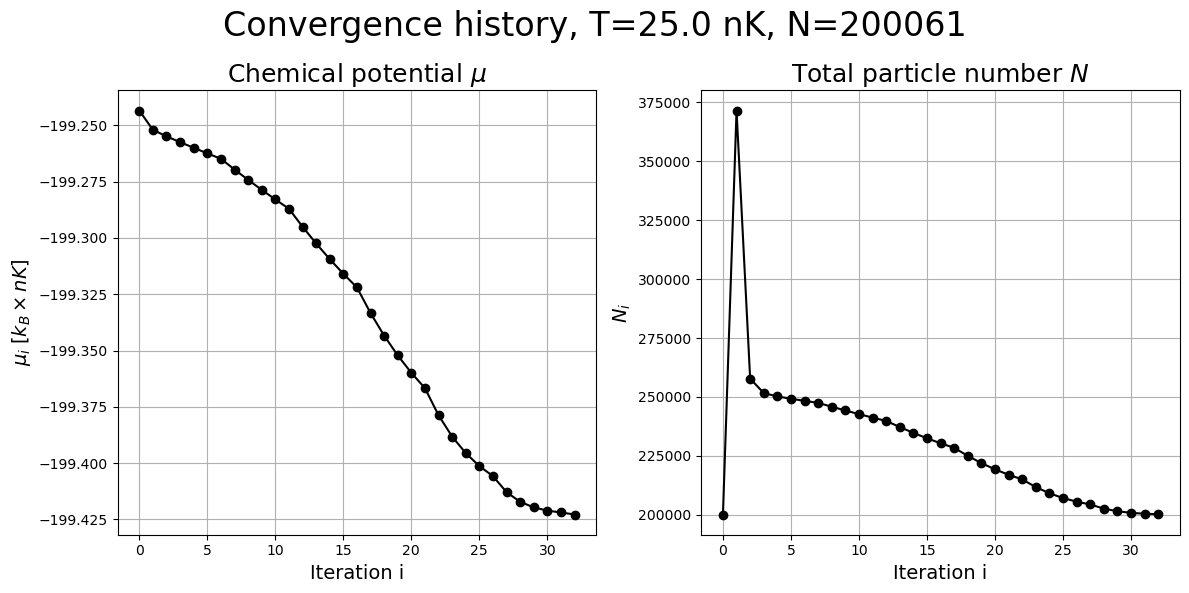

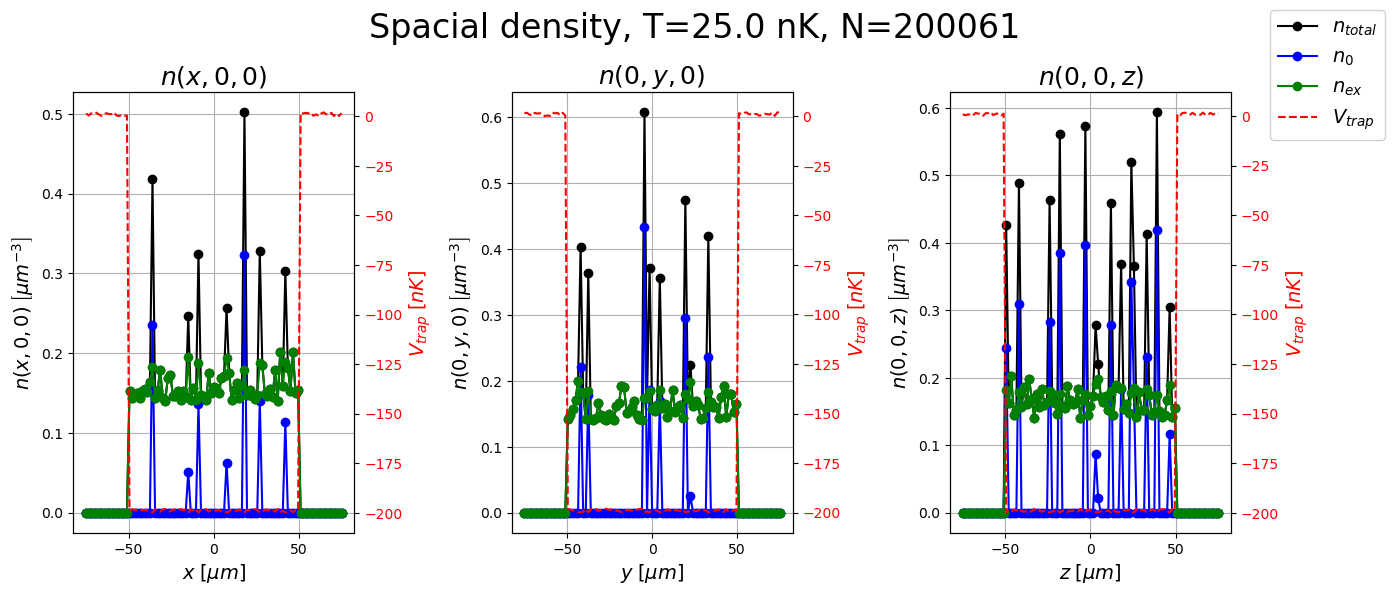

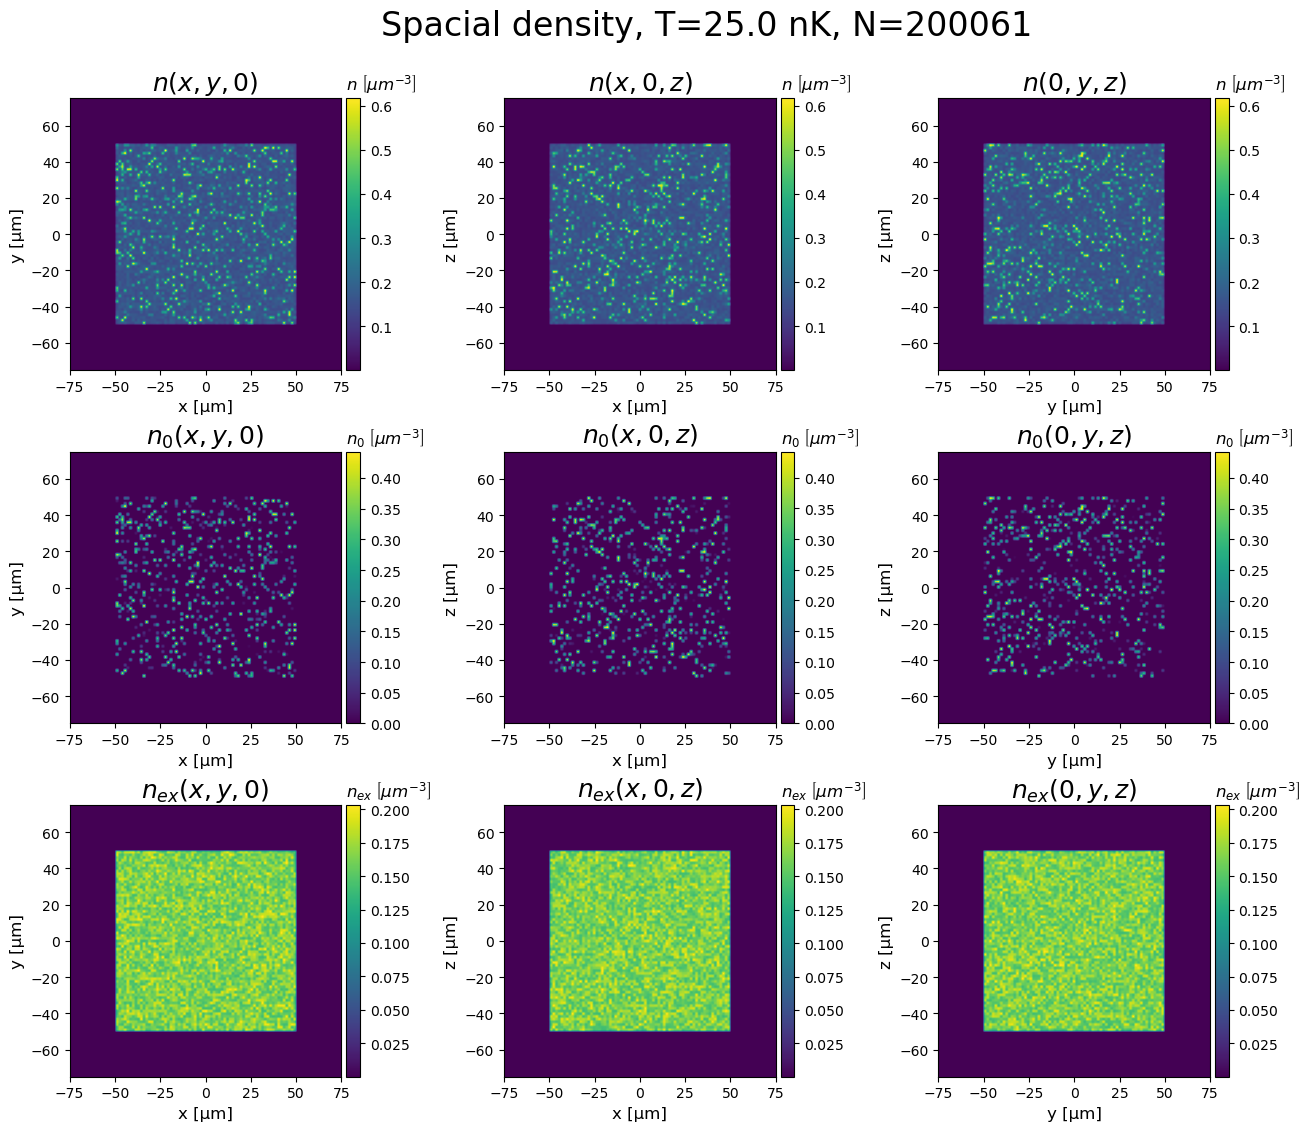

In [17]:
a = na_becs[0].plot_convergence_history()
b = na_becs[0].plot_density_1d()
c = na_becs[0].plot_density_2d()

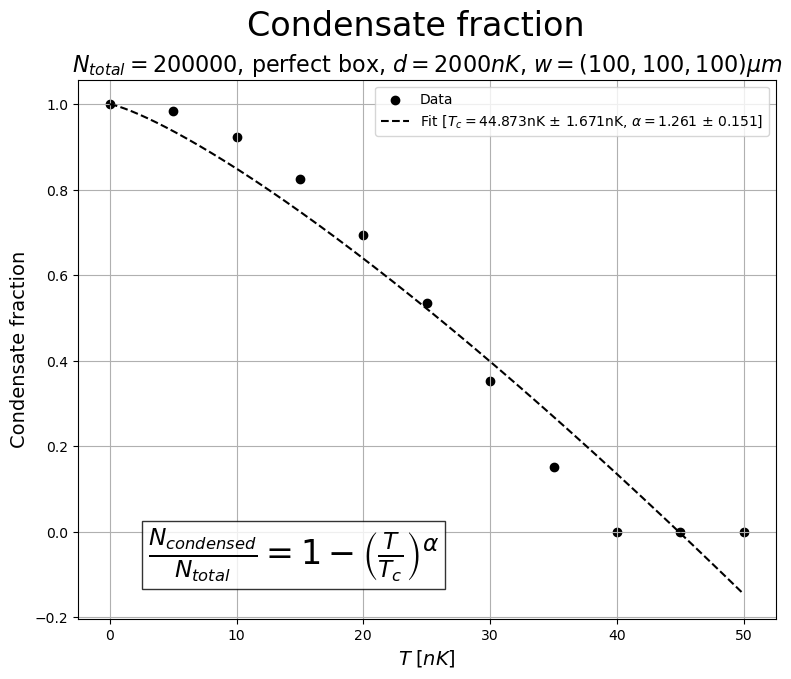

In [18]:
# Naive formula for condensate fraction (in case of non-interacting bosons)
def condens_frac(T, T_c, alpha):
    return 1 - (T / T_c)**alpha

initial_guess_fit_params = [40, 3/2]
condens_fracs = [na_bec.condensate_fraction for na_bec in na_becs]
popt, pcov = curve_fit(condens_frac, Ts.value, condens_fracs, p0=initial_guess_fit_params)
perr = np.sqrt(np.diag(pcov))
x_fit = np.linspace(Ts[0].value, Ts[-1].value, 1000)
y_fit = condens_frac(x_fit, *popt)

fig, axs = plt.subplots(1, 1, figsize=(9, 7))
fig.suptitle('Condensate fraction', fontsize=24)
axs.scatter(Ts, condens_fracs, c='k', marker='o', label='Data')
axs.plot(x_fit, y_fit, c='k', linestyle='--', label=r'Fit [$T_c=$%.3fnK $\pm$ %.3fnK, $\alpha=$%.3f $\pm$ %.3f]'\
                                                      % (popt[0], perr[0], popt[1], perr[1]))
axs.set_xlabel(r'$T \; \left[ nK \right]$', fontsize=14)
axs.set_ylabel(r'Condensate fraction', fontsize=14)
axs.set_title(r'$N_{total}=200000$, perfect box, $d=2000nK$, $w=(100,100,100)\mu m$', fontsize=16)
axs.legend(fontsize=10)
axs.grid(True)
t = axs.text(0.1, 0.1, r'$\frac{N_{condensed}}{N_{total}} = 1 - \left( \frac{T}{T_c} \right)^{\alpha}$', transform=plt.gca().transAxes,
         fontsize=24, color='black', bbox=dict(facecolor='white', alpha=0.8))

With the 1% inhomogenity, the critical temperature of the box increases to roughly $T_c=40nK$ instead of $T_c=25nK$ found previously in the perfect box (box depth is still $d=2000nK$).

Let us now look at the density at $T=0nK$!

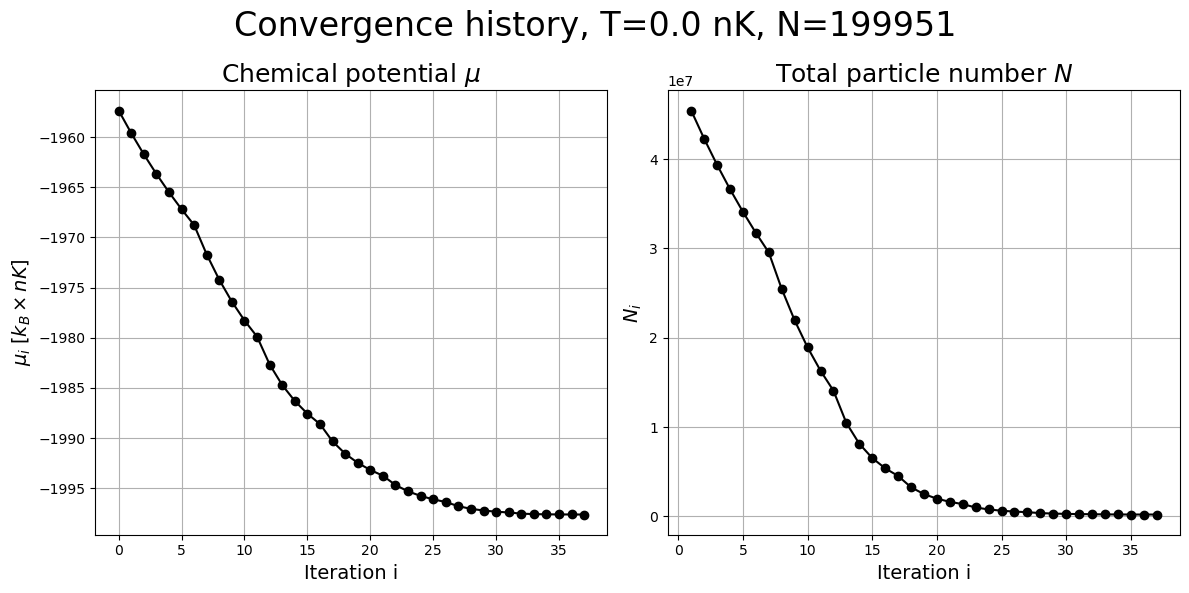

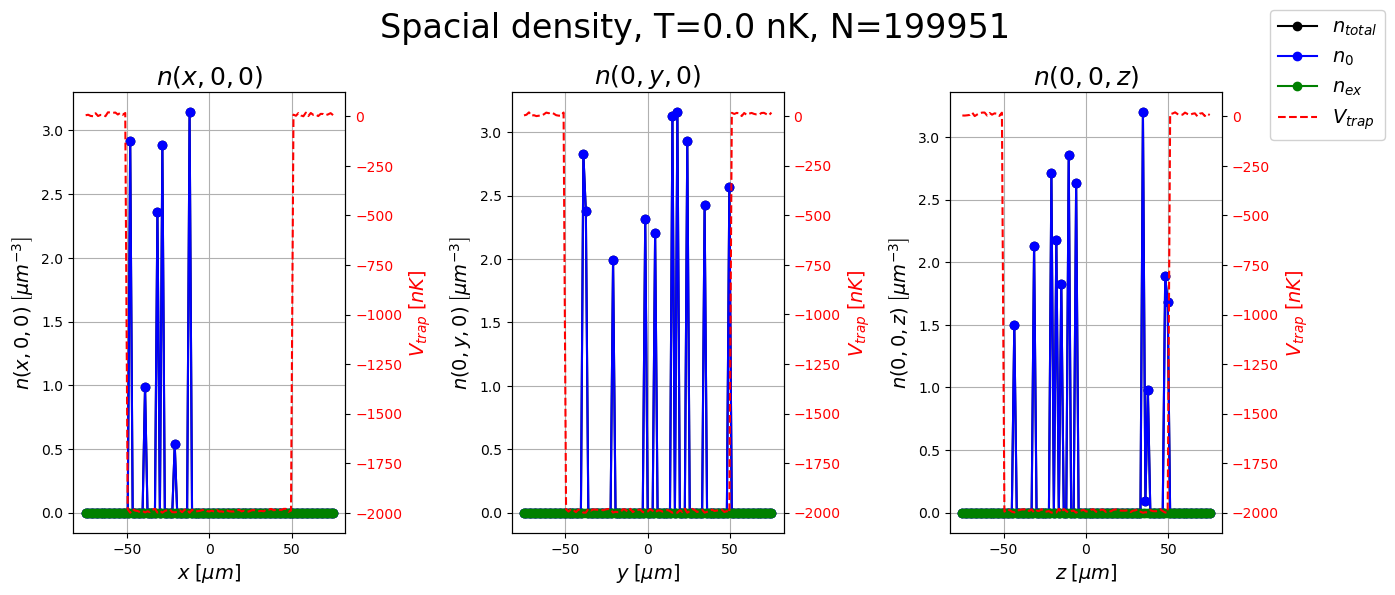

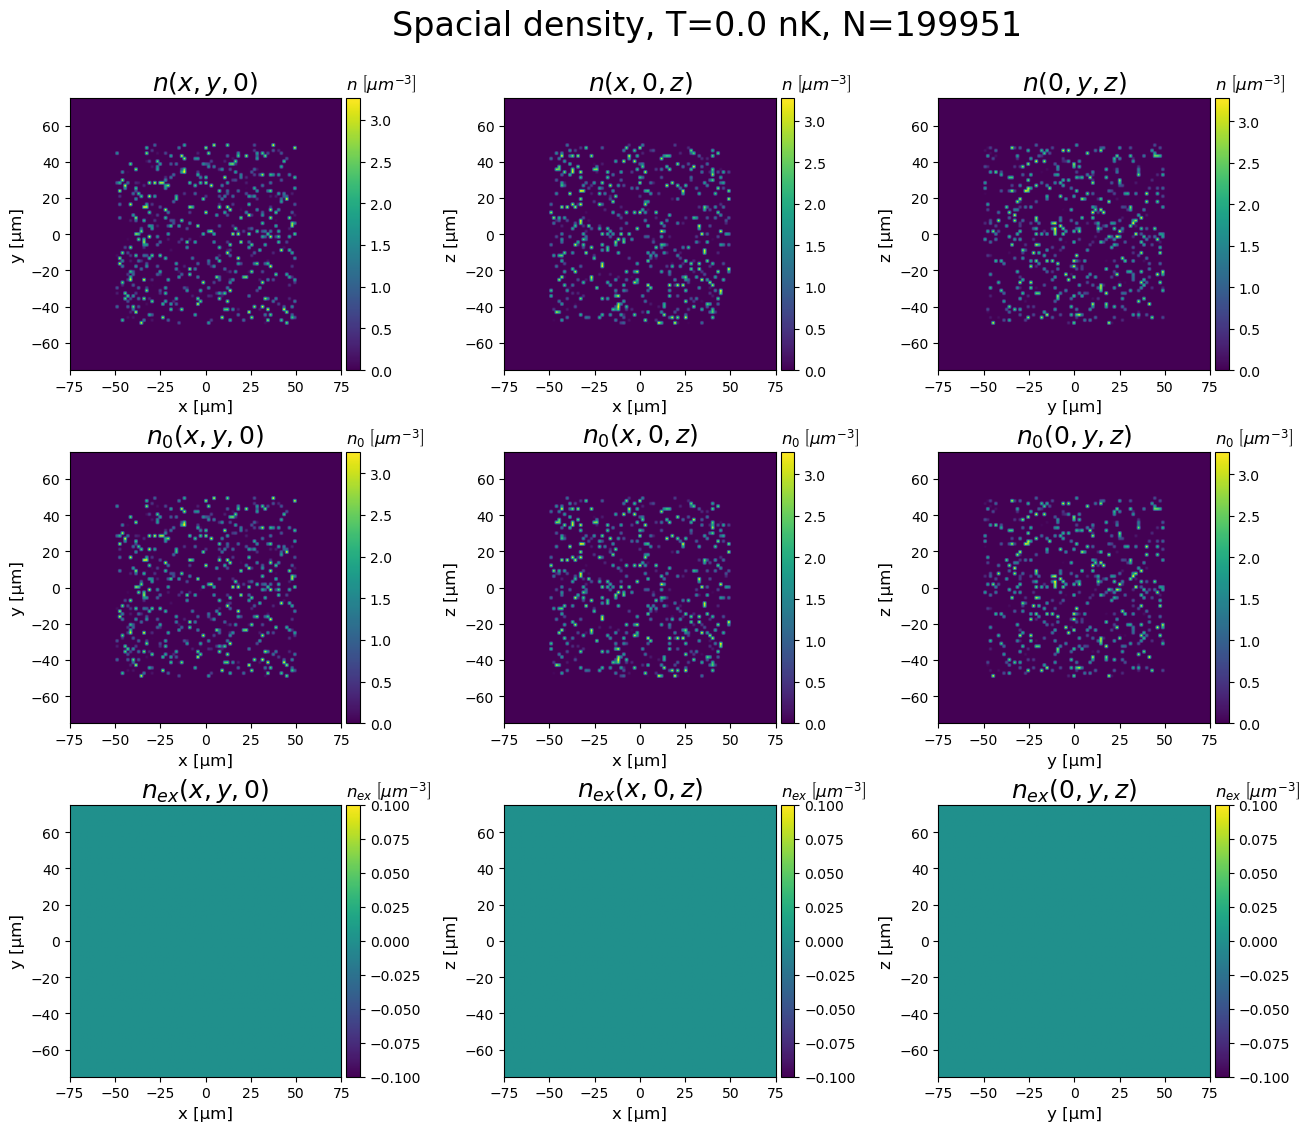

In [19]:
a = na_becs[0].plot_convergence_history()
b = na_becs[0].plot_density_1d()
c = na_becs[0].plot_density_2d()

We see that 1% inhomogenity already yields a pretty ugly BEC, basically consisting of a bunch of mini BECs at positions where the potential is locally a bit lower than around it. This happens because the chemical potential $\mu$ is very low!

In [38]:
np.min(na_becs[0].V_trap_array)

<Quantity -1999.99997605 nK>

In [37]:
na_becs[0].mu

<Quantity -2011.23867542 nK>

Let us next take a look at $T=25nk$, where the condensate fraction is about 50%.

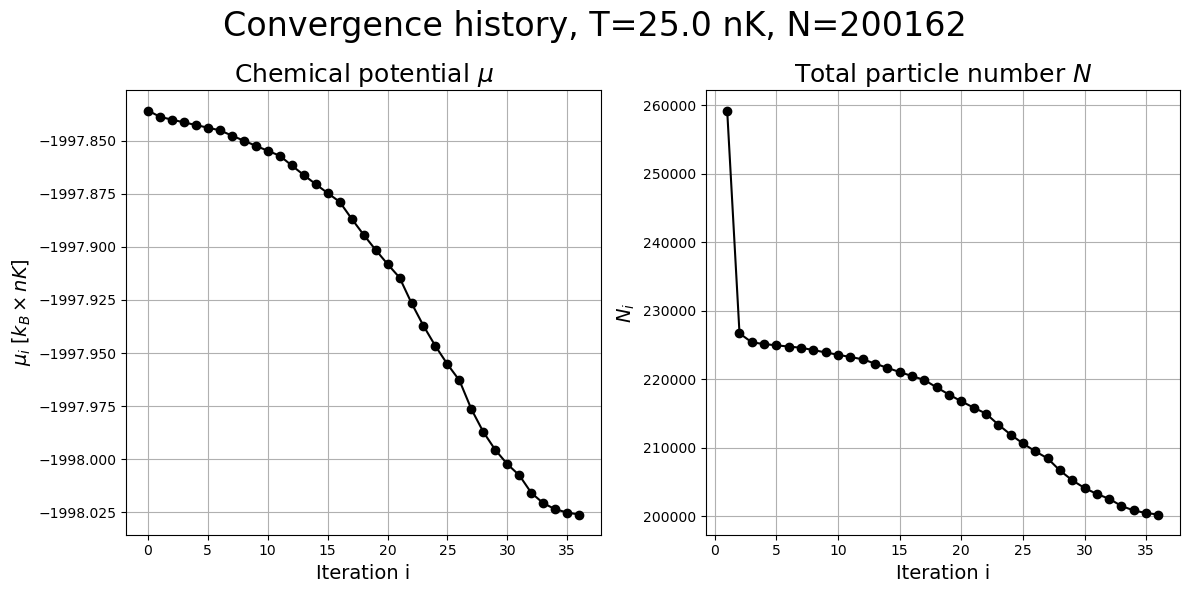

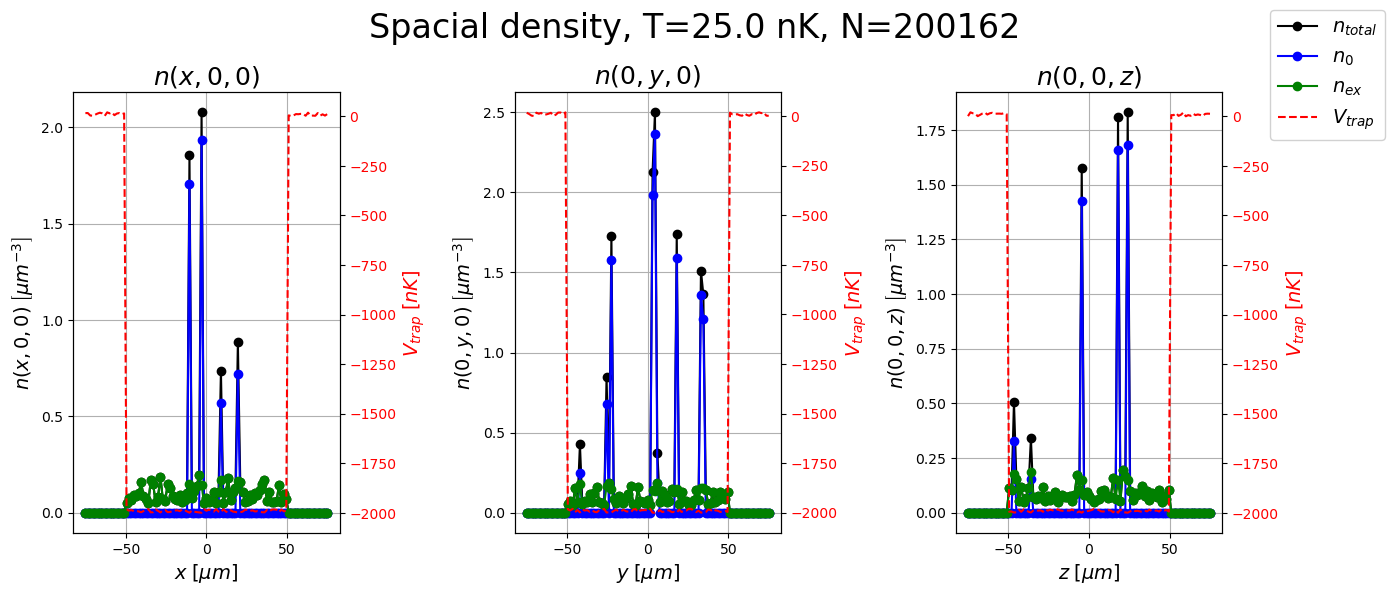

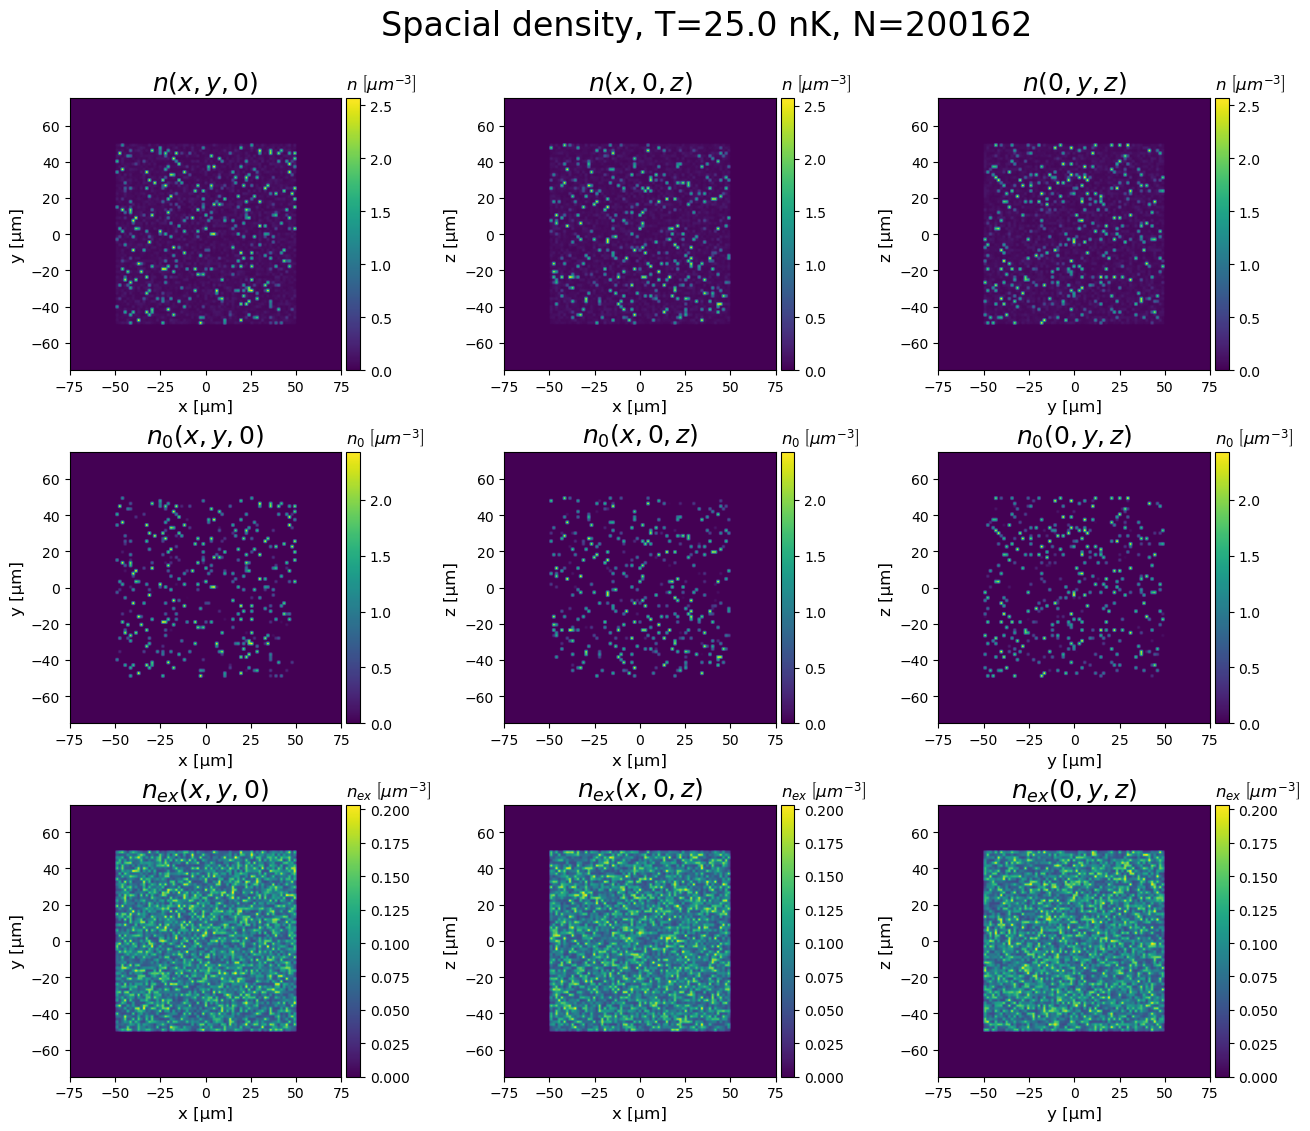

In [22]:
a = na_becs[5].plot_convergence_history()
b = na_becs[5].plot_density_1d()
c = na_becs[5].plot_density_2d()

The condensate density looks pretty much as in the zero temperature case, but the thermal density looks a bit more uniform. 

Finally, we also look at $T=50nk$, where the condensate fraction is 0%.

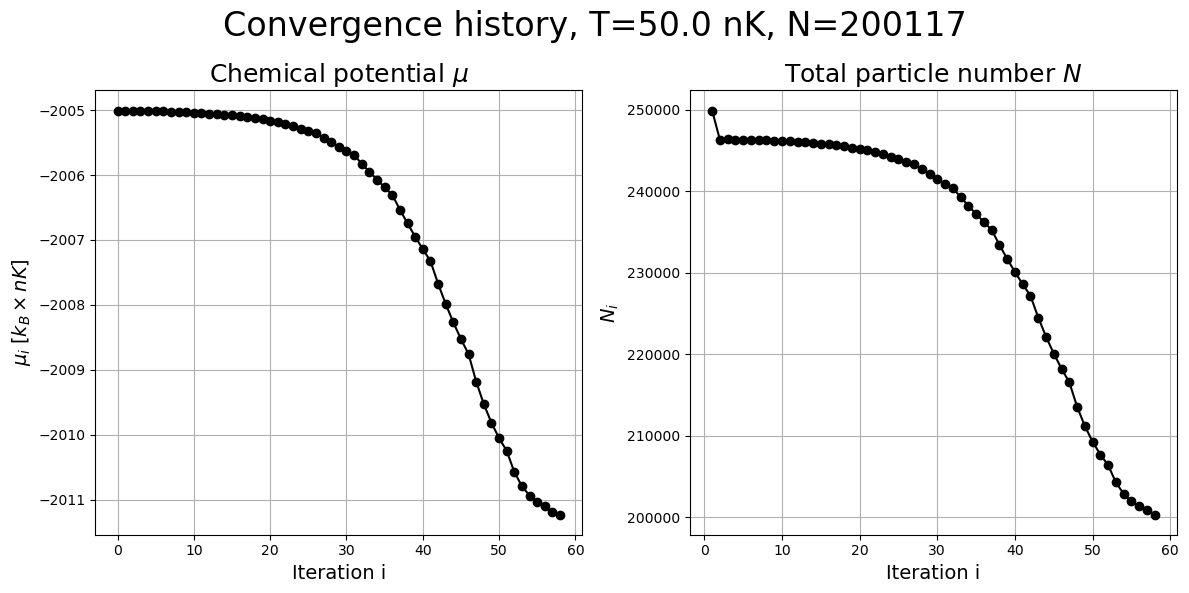

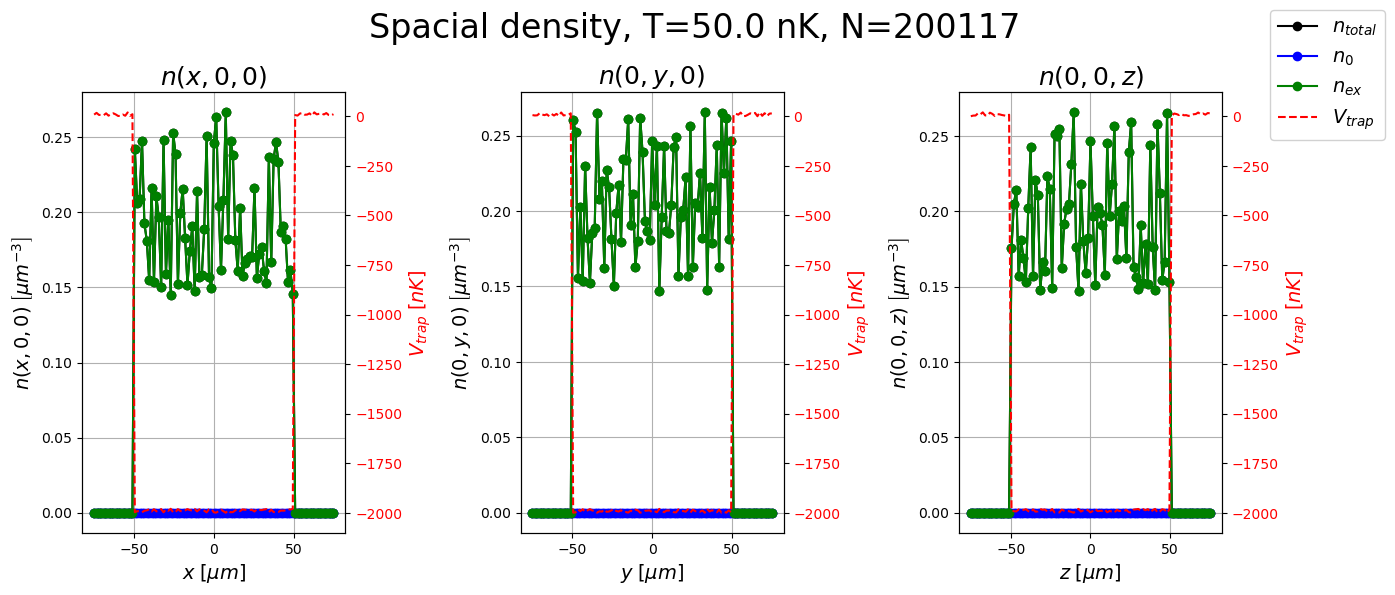

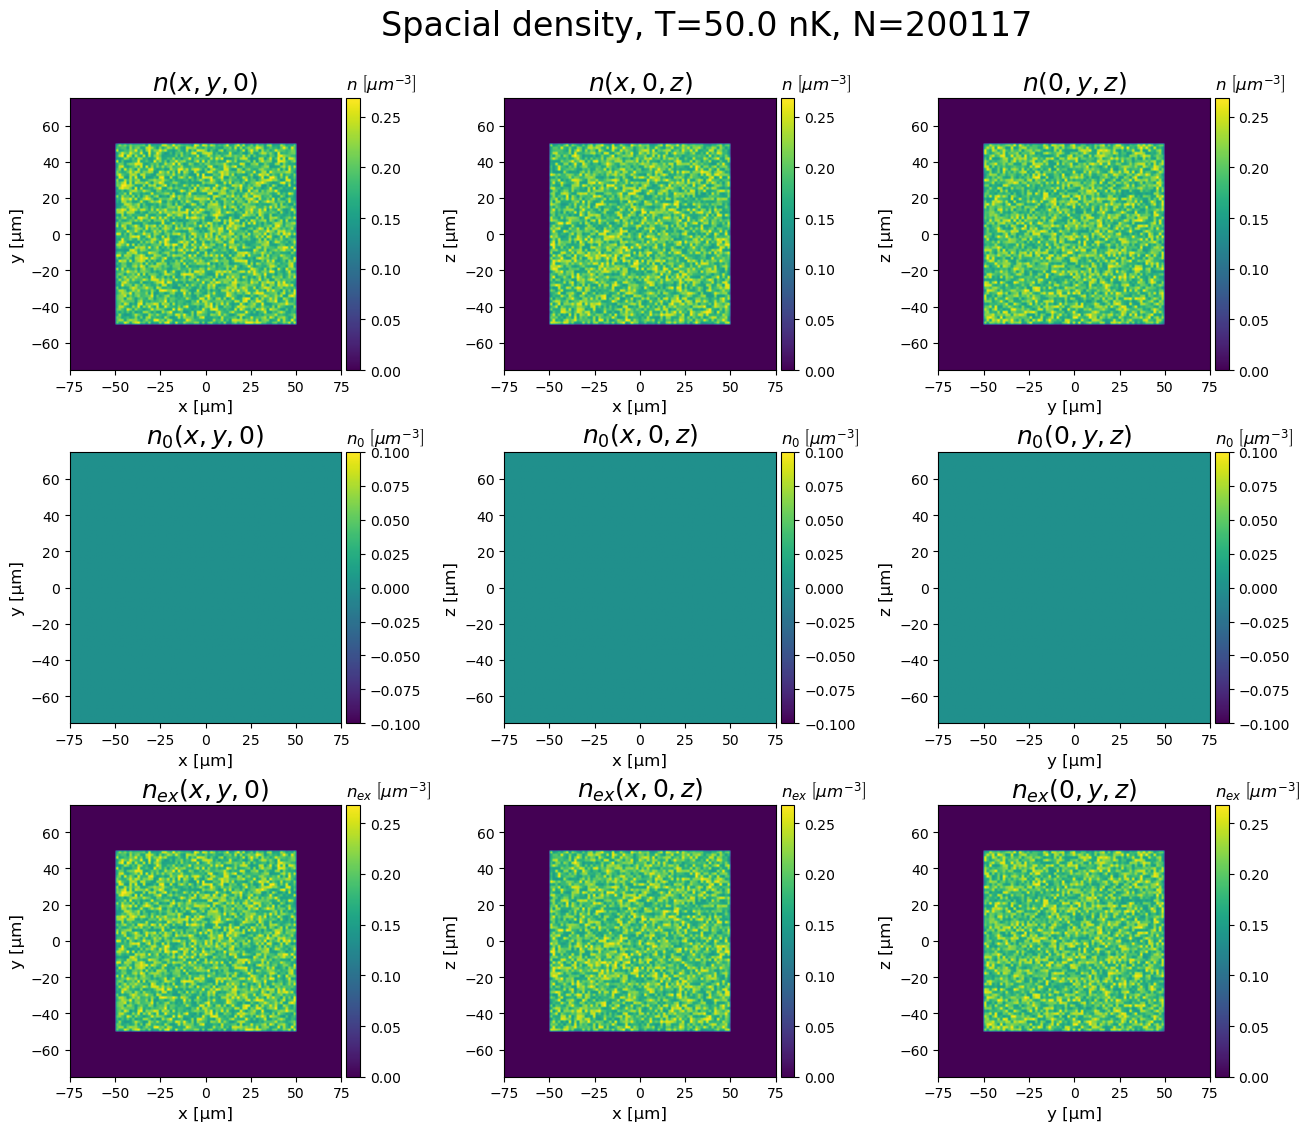

In [23]:
a = na_becs[-1].plot_convergence_history()
b = na_becs[-1].plot_density_1d()
c = na_becs[-1].plot_density_2d()

We see now, that the thermal density is more or less uniform even with 1% inhomogenity. 

<h3>Realistic box trap</h3>

I use here the camera readout from Christine for the paint beam. The ring beam is just a perfect ring right now since I don't yet have camera readout for that available. Let us assume a box depth of $1500nK$ and first take a look at how our potential actually looks like to visually compare it to the imperfect box from before.

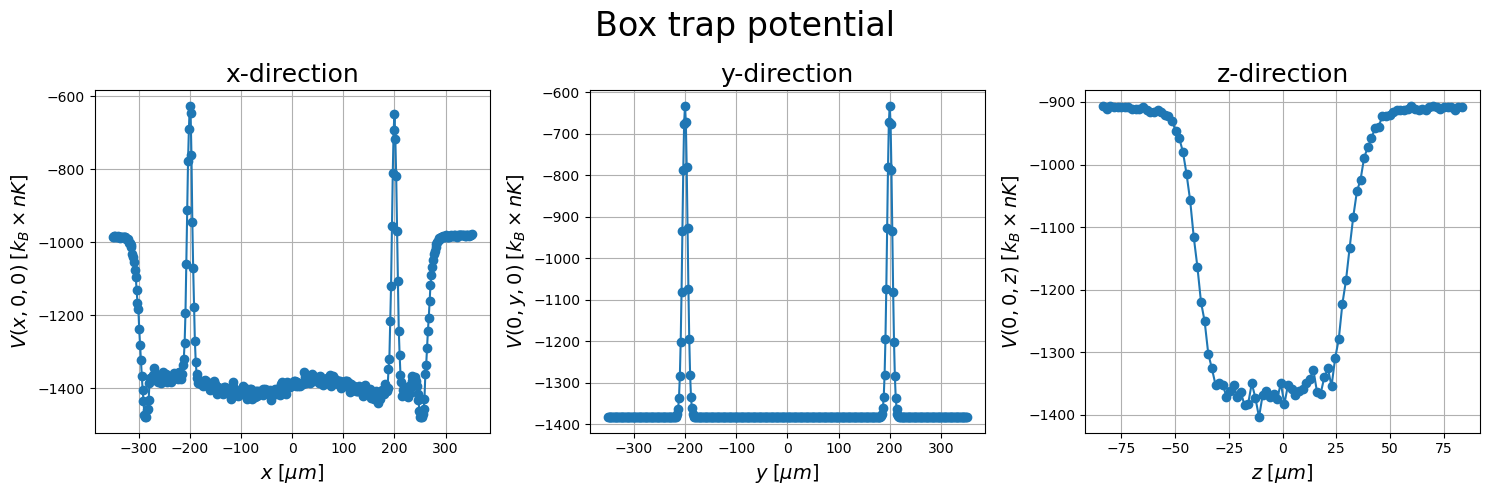

In [5]:
paint_trap_depth = 500 * u.nK
ring_trap_depth = 750 * u.nK

I_paint_x = np.loadtxt('./cross_hor_5600_rec.txt')
I_paint_z = np.loadtxt('./cross_ver_5600_rec.txt')

x = np.linspace(-1.67*len(I_paint_x)/2, 1.67*len(I_paint_x)/2, len(I_paint_x)) * u.um
y = x
z = np.linspace(-1.67*len(I_paint_z)/2, 1.67*len(I_paint_z)/2, len(I_paint_z)) *u.um

ring_radius = 200 * u.um
waist_of_ring = 10 * u.um
I_ring_x = (np.exp(-2 * (x-ring_radius)**2 / waist_of_ring**2) + np.exp(-2 * (x+ring_radius)**2 / waist_of_ring**2)).value
I_ring_y = (np.exp(-2 * (y-ring_radius)**2 / waist_of_ring**2) + np.exp(-2 * (y+ring_radius)**2 / waist_of_ring**2)).value

# red detuned paint beam, blue detuned ring beam
# in x-direction both the paint and the ring beam have a x-dependent intensity profile
Vx = -paint_trap_depth * I_paint_x/np.max(I_paint_x) + ring_trap_depth * I_ring_x/np.max(I_ring_x) # in [k_B x nK]
# in y-direction constant red-detuned background from paint beam, y-dependent ring beam intensity profile
Vy = -paint_trap_depth +  ring_trap_depth * I_ring_y/np.max(I_ring_y) # in [k_B x nK]
# in z-direction the paint beam intensity profile varies and ring-beam has zero intensity 
Vz = -paint_trap_depth * I_paint_z/np.max(I_paint_z)

# Create 3d spacial array for potential
VX, VY, VZ = np.meshgrid(Vx, Vy, Vz, indexing='ij')
V_trap_array = VX + VY + VZ

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Box trap potential', fontsize=24)

axs[0].plot(x, V_trap_array[:, len(y)//2, len(z)//2], marker='o')
axs[0].set_xlabel(r'$x \; \left[\mu m\right]$', fontsize=14)
axs[0].set_ylabel(r'$V(x,0,0) \; \left[k_B \times nK\right]$', fontsize=14)
axs[0].set_title(r'x-direction', fontsize=18)
axs[0].grid(True)

axs[1].plot(y, V_trap_array[len(x)//2, :, len(z)//2], marker='o')
axs[1].set_xlabel(r'$y \; \left[\mu m\right]$', fontsize=14)
axs[1].set_ylabel(r'$V(0,y,0) \; \left[k_B \times nK\right]$', fontsize=14)
axs[1].set_title(r'y-direction', fontsize=18)
axs[1].grid(True)

axs[2].plot(z, V_trap_array[len(x)//2, len(y)//2, :], marker='o')
axs[2].set_xlabel(r'$z \; \left[\mu m\right]$', fontsize=14)
axs[2].set_ylabel(r'$V(0,0,z) \; \left[k_B \times nK\right]$', fontsize=14)
axs[2].set_title(r'z-direction', fontsize=18)
axs[2].grid(True)

fig.tight_layout()

We see that the inhomogenity is much more than 1% from what it looks like right now, but let's anyway calculate the density at $T=0nK$ to see how it looks like.

In [6]:
m = 3.8175405e-26               # mass of sodium atom in [kg]
a_s = 2.75e-9                   # s-wave scattering length of sodium in [m]
N_atoms = 200000                # Number of sodium atoms in the trap

# x, y, z-axis in [μm] already defined above

T = 0 * u.nK
na_bec_box = BEC(m, a_s, N_atoms, T, V_trap_array, x=x, y=y, z=z)
na_bec_box.eval_density()

  0%|          | 0/1000 [00:00<?, ?it/s]

Convergence reached after 52 iterations.


Let us take a look at the density

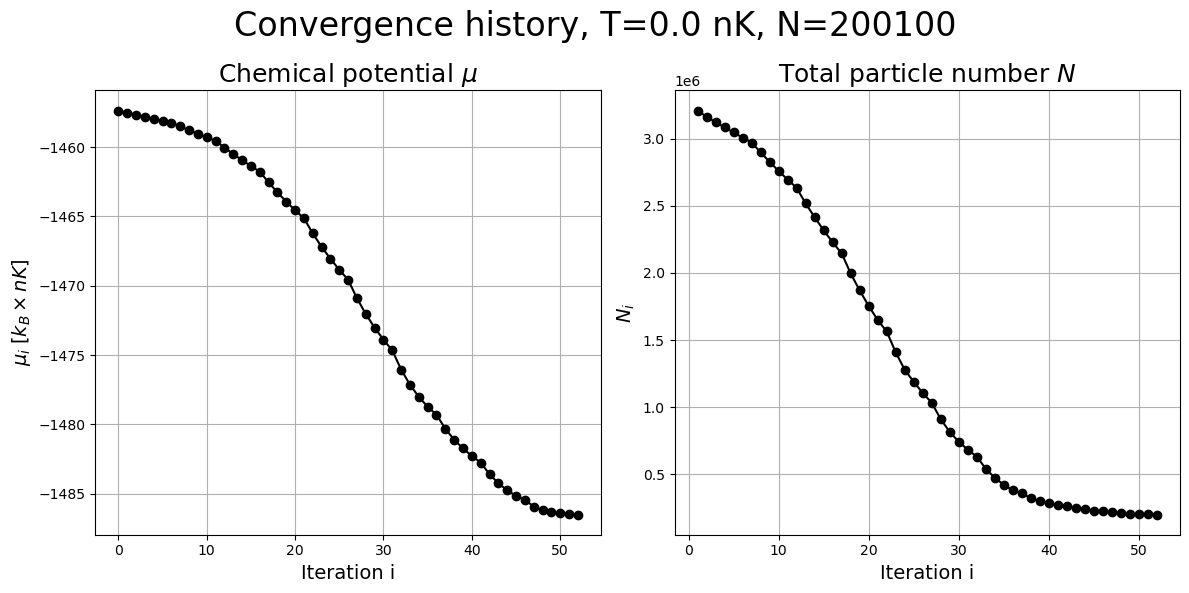

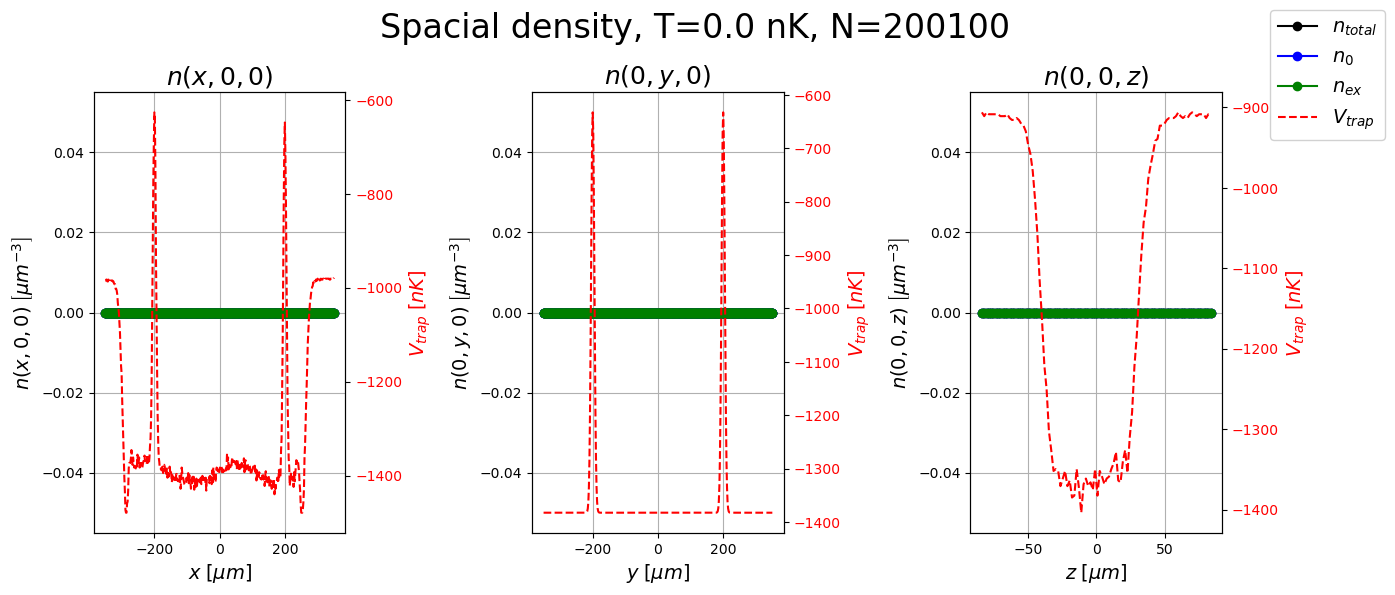

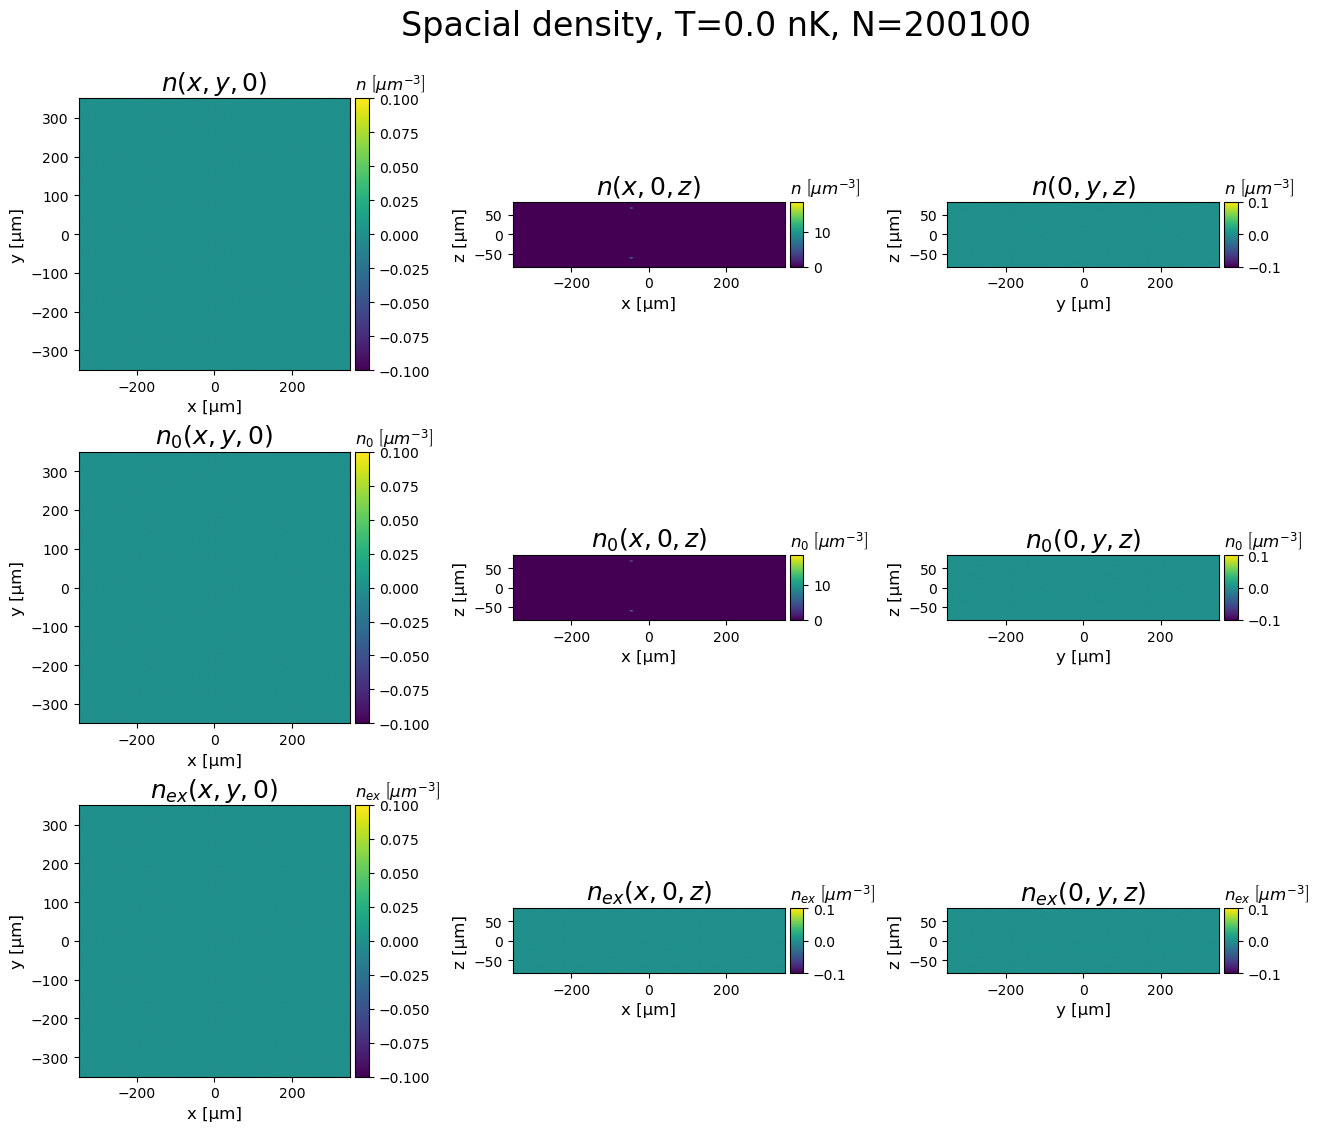

In [7]:
a = na_bec_box.plot_convergence_history()
b = na_bec_box.plot_density_1d()
c = na_bec_box.plot_density_2d()

We see no density whatsoever in the spacial region we are looking for it right now. Let us find out where in space the density is non-zero

In [8]:
#indices = np.where(na_bec_box.n0_array > 0)
#values = na_bec_box.n0_array[indices]
#result = list(zip(zip(*indices), values))

#for (i, j, k), value in result:
    #print(f"Index: ({i}, {j}, {k}), Value: {value}")

Apparently, there is only non-zero density at z-index 43, which corresponds to the following z-position

In [9]:
z[43]

<Quantity -10.96464646 um>

In [10]:
x[38]

<Quantity -287.08854415 um>

Looking at the potential plotted above, we see that this corresponds to the local minimum which is due to the inhomogenity and which is so deep that the chemical potential does not allow for particles to be at any other position in space than in the x-y-plane at this specific z-position. It looks like this

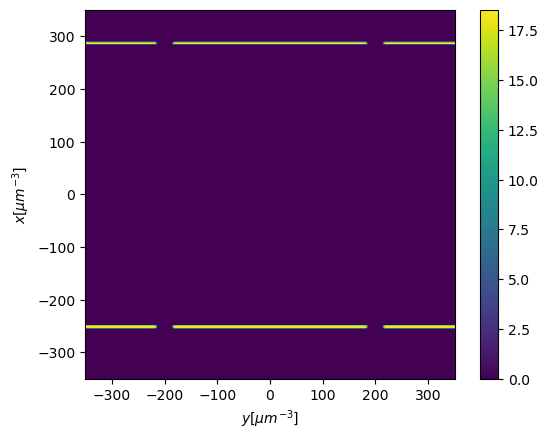

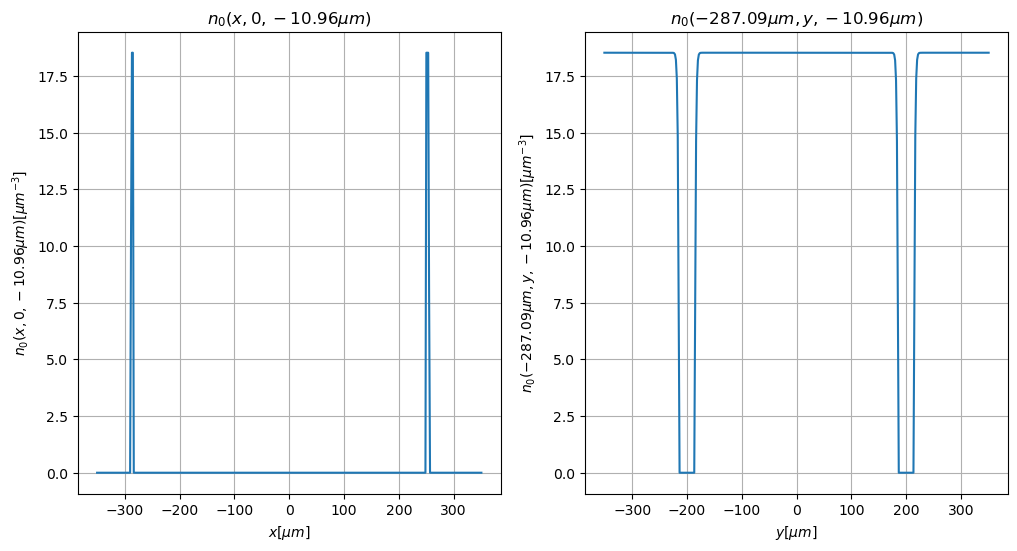

In [11]:
plt.imshow(na_bec_box.n0_array[:,:,43].value, extent=[y[0].value, y[-1].value, x[0].value, x[-1].value,])
plt.ylabel(r'$x [\mu m ^{-3}]$')
plt.xlabel(r'$y [\mu m ^{-3}]$')
plt.colorbar()

fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].plot(x, na_bec_box.n0_array[:,len(y)//2,43].value)
axs[0].set_xlabel(r'$x [\mu m]$')
axs[0].set_ylabel(r'$n_0(x,0,-10.96\mu m) [\mu m^{-3}]$')
axs[0].set_title(r'$n_0(x,0,-10.96\mu m)$')
axs[0].grid(True)

axs[1].plot(y, na_bec_box.n0_array[38,:,43].value)
axs[1].set_xlabel(r'$y [\mu m]$')
axs[1].set_ylabel(r'$n_0(-287.09\mu m,y,-10.96\mu m) [\mu m^{-3}]$')
axs[1].set_title(r'$n_0(-287.09\mu m,y,-10.96\mu m)$')
axs[1].grid(True)

The next step is certainly to include fermions in order to study the Na BEC in the presence of potassium atoms. Then we can quantify the necessary homogenity for the boy trap with a realistic model! 

In [12]:
na_bec_box.mu

<Quantity -1486.50108225 nK>

In [13]:
np.min(na_bec_box.V_trap_array)

<Quantity -1500. nK>